Realizamos un head para ver los 5 primeros registros del dataset.  


In [384]:
import pandas as pd

raw_dataset = pd.read_csv("winequality_BDS.csv", delimiter=";")
raw_dataset.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates alcohol  quality  
0       0.42    11.8        6  
1       0.39    10.2        6  
2       0.53    12.7        6  
3       0.56     9.4        5  
4       0.38    10.2        5

Realizamos el método info() para ver la cantidad de registros que tenemos, el número de columnas, la cantidad de valores nulos en ellas, y el tipo de dato (dtype) asociado a cada una

In [385]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


Con el método describe() extraemos una serie de estadísticas descriptivas de todas las columnas

In [386]:
raw_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3231.000000       3231.000000  3231.000000     3231.000000   
mean        7.414082          0.403802     0.288028        4.526339   
std         1.598760          0.189421     0.156842        4.143991   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.360000     0.280000        2.500000   
75%         8.000000          0.530000     0.370000        6.100000   
max        15.900000          1.580000     1.000000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3231.000000          3231.000000           3231.000000  3231.000000   
mean      0.066149            25.649335             88.349892     1.901500   
std       0.041908            17.422288             54.633913     8.747779   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992550   
50%       0.058000            23.000000             89.000000     0.995500   
75%       0.080000            35.000000            127.000000     0.997230   
max       0.611000           289.000000            440.000000   100.369000   

                pH    sulphates      quality  
count  3231.000000  3231.000000  3231.000000  
mean      3.235908     0.573680     5.785825  
std       0.164921     0.166353     0.829374  
min       2.740000     0.230000     3.000000  
25%       3.120000     0.470000     5.000000  
50%       3.230000     0.550000     6.000000  
75%       3.340000     0.650000     6.000000  
max       4.010000     2.000000     8.000000

Luego de utilizar estos métodos podemos ver que nuestro dataset contiene un total de 3231 filas. 

Realizaremos un análisis exploratorio del dataset

Procedemos a buscar filas repetidas, valores nulos o inconsistentes

In [387]:
# Identificar valores nulos, NANs y duplicados

print("Valores nulos por columna:")
print(raw_dataset.isnull().sum())

print(" ")

print("NAN por columna: ")
print(raw_dataset.isna().sum())

print(" ")

print("Número de filas duplicadas:", raw_dataset.duplicated().sum())

Valores nulos por columna:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
 
NAN por columna: 
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
 
Número de filas duplicadas: 588


Observamos que no hay valores nulos ni repetidos en las columnas, pero si hay 588 filas repetidas.

Procedemos a eliminarlas


In [388]:
# Eliminar filas duplicadas
preprocessed_dataset = raw_dataset
preprocessed_dataset.drop_duplicates(keep="first", inplace=True)
print("Número de filas después de eliminar las duplicadas:", raw_dataset.shape[0])

Número de filas después de eliminar las duplicadas: 2643


Procedemos a realizar el análisis univariado

Primero analizamos la variable type; representa el tipo de uva usada para elaborar el vino.

No hay valores nulos cargados en esta columna.

In [389]:
# imprimimos las frecuencias absolutas de cada valor de la columna type
preprocessed_dataset["type"].value_counts()

type
Syrah       1359
Moscatel    1284
Name: count, dtype: int64

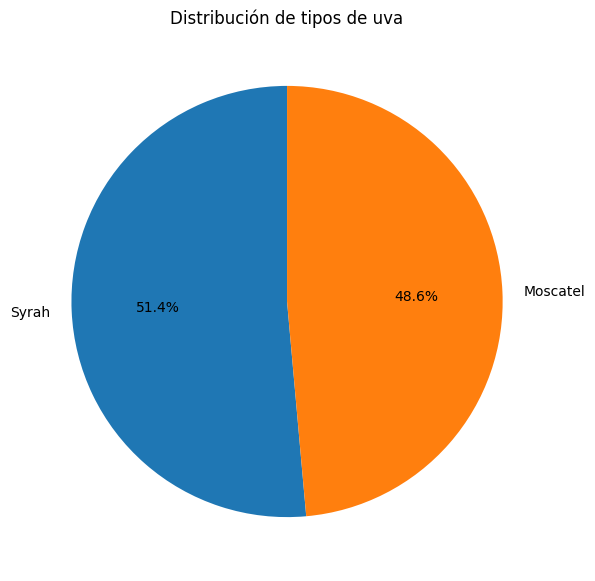

In [390]:
import matplotlib.pyplot as plt

conteo_tipos = preprocessed_dataset["type"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(conteo_tipos.values, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de tipos de uva")
plt.show()

Hay una corta diferencia entre la cantidad de tipo de uvas usada para elaborar vinos en el dataset propuesto.

Procedemos a analizar la variable fixed acidity, que representa la cantidad de ácidos no volátiles presentes en el vino medidas en gramo por litro.

El rango normal de la acidez fija es amplio, siendo entre 1.7 y 17.5 gramos por litro.

In [391]:
# imprimimos las frecuencias absolutas de cada valor de la columna fixed acidity 
preprocessed_dataset["fixed acidity"].value_counts()

fixed acidity
6.6     125
6.8     115
6.4     111
7.1      90
6.0      89
       ... 
13.4      1
15.0      1
4.6       1
3.9       1
12.1      1
Name: count, Length: 100, dtype: int64

In [392]:
print("mediana: ", preprocessed_dataset["fixed acidity"].median())
print("maximo: ", preprocessed_dataset["fixed acidity"].max())
print("minimo: ", preprocessed_dataset["fixed acidity"].min())

mediana:  7.0
maximo:  15.9
minimo:  3.8


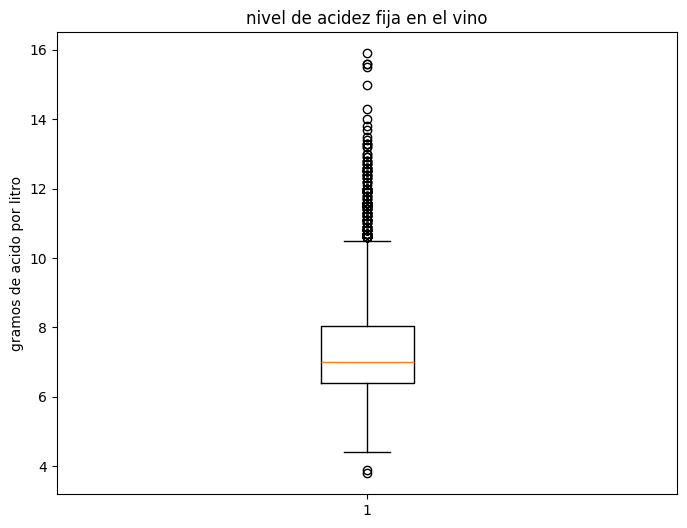

In [393]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["fixed acidity"])
plt.ylabel("gramos de acido por litro")
plt.title("nivel de acidez fija en el vino")
plt.show()

En el anterior boxplot se pueden ver outliers, pero los valores se encuentran dentro de los parámetros normales que van de 1.7 a 17.5 g/L

Ahora se analizará la variable volatile acidity (acidez volátil) que representa la cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 


In [394]:
# imprimimos las frecuencias absolutas de cada valor de la columna volatile acidity
preprocessed_dataset["volatile acidity"].value_counts()

volatile acidity
0.280    92
0.240    82
0.220    77
0.260    74
0.320    71
         ..
0.845     1
1.240     1
0.805     1
1.185     1
0.375     1
Name: count, Length: 172, dtype: int64

In [395]:
print("mediana: ", preprocessed_dataset["volatile acidity"].median())
print("maximo: ", preprocessed_dataset["volatile acidity"].max())
print("minimo: ", preprocessed_dataset["volatile acidity"].min())

mediana:  0.36
maximo:  1.58
minimo:  0.085


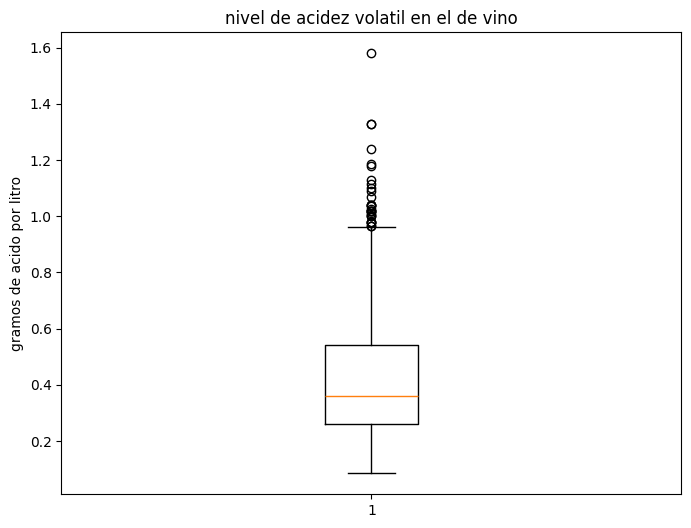

In [396]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["volatile acidity"])
plt.ylabel("gramos de acido por litro")
plt.title("nivel de acidez volatil en el de vino")
plt.show()

In [397]:
vinos_picados = raw_dataset[raw_dataset["volatile acidity"] >= 1]
vinos_picados["volatile acidity"].count()

24

En el 50% de las muestras de vinos que tenemos la cantidad de acido volatil se mantiene por dentro del rango normal, que va de 0.3 a 0.7g/L, pero igualmente tenemos varios outliers

Ademas podemos observar que tenemos en la muestra 24 vinos "picados", ya que su contenido de acidez volátil supera el gramo por litro

Citric acid (ácido cítrico) es el contenido de ácido cítrico en el vino, medido en gramos por litro:

In [398]:
# imprimimos las frecuencias absolutas de cada valor de la columna citric acid
preprocessed_dataset["citric acid"].value_counts()

citric acid
0.00    126
0.28    124
0.30    115
0.32    107
0.26     99
       ... 
1.00      2
0.91      1
0.86      1
0.82      1
0.75      1
Name: count, Length: 83, dtype: int64

In [399]:
print("mediana: ", preprocessed_dataset["citric acid"].median())
print("maximo: ", preprocessed_dataset["citric acid"].max())
print("minimo: ", preprocessed_dataset["citric acid"].min())

mediana:  0.29
maximo:  1.0
minimo:  0.0


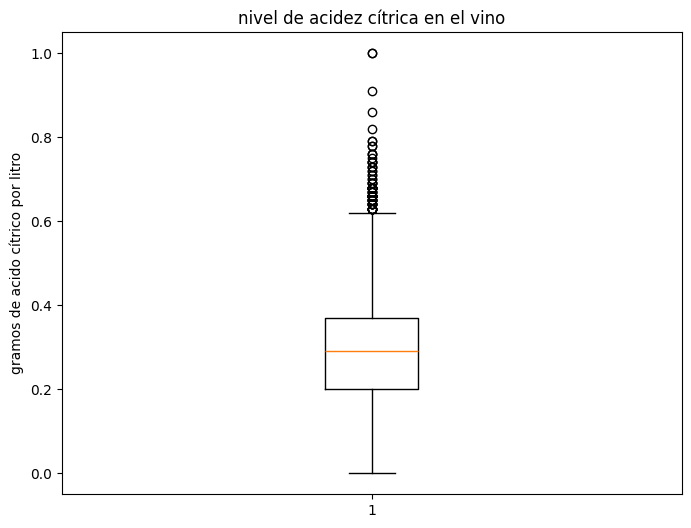

In [400]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["citric acid"])
plt.ylabel("gramos de acido cítrico por litro")
plt.title("nivel de acidez cítrica en el vino")
plt.show()

Podemos observar que la todas las muestras se encuentran dentro del rango normal de concentración de acidez cítrica, que suele estar entre 0.1 y 1 g/L.

Residual sugar (azúcar residual), es la cantidad de azúcar restante en el vino después de la fermentación, medida en gramos por litro:

In [401]:
# imprimimos las frecuencias absolutas de cada valor de la columna residual sugar
preprocessed_dataset["residual sugar"].value_counts()

residual sugar
2.00     160
1.80     130
2.20     123
1.90     118
2.10     114
        ... 
18.80      1
17.75      1
17.60      1
26.05      1
3.75       1
Name: count, Length: 234, dtype: int64

In [402]:
print("mediana: ", preprocessed_dataset["residual sugar"].median())
print("maximo: ", preprocessed_dataset["residual sugar"].max())
print("minimo: ", preprocessed_dataset["residual sugar"].min())

mediana:  2.4
maximo:  26.05
minimo:  0.7


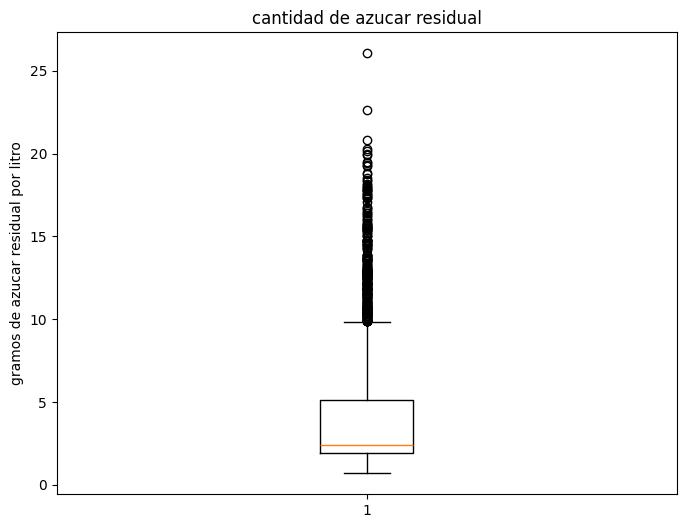

In [403]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["residual sugar"])
plt.ylabel("gramos de azucar residual por litro")
plt.title("cantidad de azucar residual")
plt.show()

El amplio rango posible de cantidad de azucar residual que pueden tener los vinos según su tipo permite que todas las muestras aquí presentes tengan una cantidad normal. Igualmente se observa que en el 50% de las muestras se tiene una cantidad de 2g/L a aproximadamente 5g/L

In [404]:
# imprimimos las frecuencias absolutas de cada valor de la columna chlorides
preprocessed_dataset["chlorides"].value_counts()

chlorides
0.036    66
0.048    60
0.044    52
0.050    52
0.042    51
         ..
0.467     1
0.401     1
0.464     1
0.160     1
0.230     1
Name: count, Length: 192, dtype: int64

In [405]:
print("mediana: ", preprocessed_dataset["chlorides"].median())
print("maximo: ", preprocessed_dataset["chlorides"].max())
print("minimo: ", preprocessed_dataset["chlorides"].min())

mediana:  0.06
maximo:  0.611
minimo:  0.009


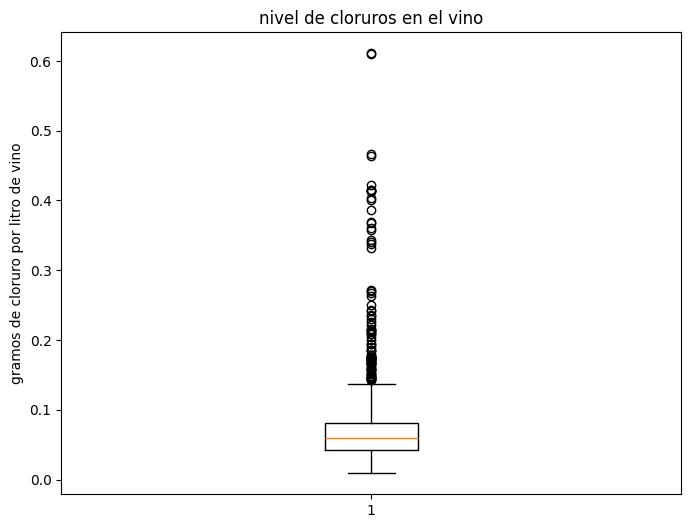

In [406]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["chlorides"])
plt.ylabel("gramos de cloruro por litro de vino")
plt.title("nivel de cloruros en el vino") 
plt.show()

La mayor parte de las muestras tienen una cantidad de cloruros que está dentro de los rangos normales (0.08 a 0.35 mg/L). Se tiene una mediana de 0.06. Luego se pueden observar tambien varios outliers, especialmente uno cuya cantidad de cloruro es 0.611 mg/L , pero consideramos no sacarlo ya que no se desvía demasiado de los valores normales que deberia tener

La variable free sulfur dioxide representa la cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 


In [407]:
# imprimimos las frecuencias absolutas de cada valor de la columna free sulfur dioxide 
preprocessed_dataset["free sulfur dioxide"].value_counts()

free sulfur dioxide
6.0      131
5.0       94
15.0      82
12.0      79
17.0      77
        ... 
73.0       1
51.5       1
61.5       1
98.0       1
124.0      1
Name: count, Length: 99, dtype: int64

In [408]:
print("mediana: ", preprocessed_dataset["free sulfur dioxide"].median())
print("maximo: ", preprocessed_dataset["free sulfur dioxide"].max())
print("minimo: ", preprocessed_dataset["free sulfur dioxide"].min())

mediana:  22.0
maximo:  289.0
minimo:  1.0


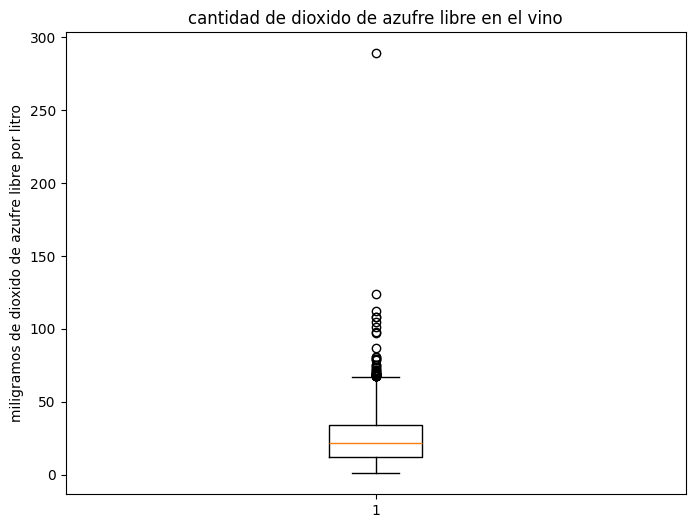

In [409]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_dataset["free sulfur dioxide"])
plt.ylabel("miligramos de dioxido de azufre libre por litro")
plt.title("cantidad de dioxido de azufre libre en el vino")
plt.show()

Vemos un outlier muy importante, que sobrepasa mucho el limite del rango de la cantidad normal (0.5 a 80 mg/L). Imputaremos su valor por la mediana para que no genere inconsistencias, y tambien para no eliminarlo y así no perder los demas datos de la muestra.

In [410]:
# transformamos el outlier a un Nan
aux = preprocessed_dataset[preprocessed_dataset["free sulfur dioxide"] > 150]
aux["free sulfur dioxide"].count()

1

In [411]:
import numpy as np
preprocessed_dataset["free sulfur dioxide"] = preprocessed_dataset["free sulfur dioxide"].where(preprocessed_dataset["free sulfur dioxide"]<= 150, np.nan)
aux = preprocessed_dataset[preprocessed_dataset["free sulfur dioxide"] > 150]
aux["free sulfur dioxide"].count()

0

In [412]:
preprocessed_dataset["free sulfur dioxide"].isna().sum()

1

Reemplazamos el Nan con la mediana

In [413]:
mediana_free_sulfur = preprocessed_dataset["free sulfur dioxide"].median()
preprocessed_dataset["free sulfur dioxide"] = preprocessed_dataset["free sulfur dioxide"].fillna(mediana_free_sulfur)

In [414]:
preprocessed_dataset["free sulfur dioxide"].isna().sum()

0

In [415]:
print("mediana: ", preprocessed_dataset["free sulfur dioxide"].median())
print("maximo: ", preprocessed_dataset["free sulfur dioxide"].max())
print("minimo: ", preprocessed_dataset["free sulfur dioxide"].min())

mediana:  22.0
maximo:  124.0
minimo:  1.0


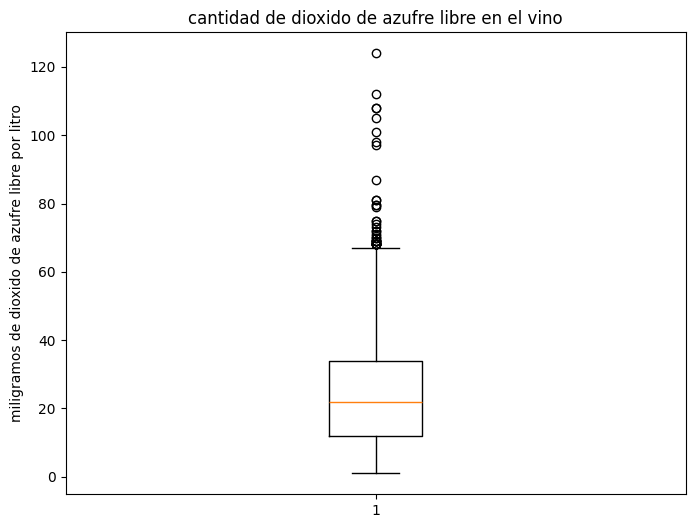

In [416]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_dataset["free sulfur dioxide"])
plt.ylabel("miligramos de dioxido de azufre libre por litro")
plt.title("cantidad de dioxido de azufre libre en el vino")
plt.show()

Ahora podemos ver una distribucion más normal de las cantidades de dióxido de azufre libre en el vino

Dioxido de azufre total

In [417]:
# imprimimos las frecuencias absolutas de cada valor de la columna total sulfur dioxide
preprocessed_dataset["total sulfur dioxide"].value_counts()

total sulfur dioxide
28.0     35
24.0     32
14.0     30
20.0     29
113.0    28
         ..
176.5     1
243.0     1
205.0     1
248.0     1
77.5      1
Name: count, Length: 228, dtype: int64

In [418]:
print("mediana: ", preprocessed_dataset["total sulfur dioxide"].median())
print("maximo: ", preprocessed_dataset["total sulfur dioxide"].max())
print("minimo: ", preprocessed_dataset["total sulfur dioxide"].min())

mediana:  86.0
maximo:  440.0
minimo:  6.0


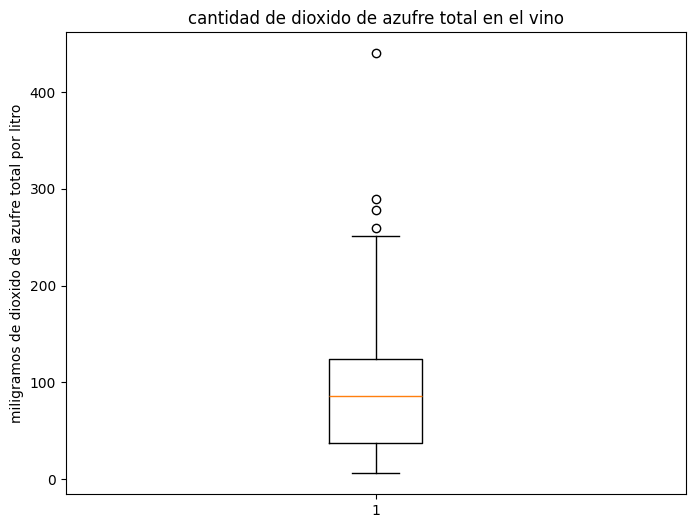

In [419]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["total sulfur dioxide"])
plt.ylabel("miligramos de dioxido de azufre total por litro")
plt.title("cantidad de dioxido de azufre total en el vino")
plt.show()

Podemos observar un outlier con una cantidad exagerada de dioxido de azufre total en comparación al mayor límite permitido: 350 mg/L, por lo que se imputará su valor por la mediana

In [420]:
aux = preprocessed_dataset[preprocessed_dataset["total sulfur dioxide"] > 400]
aux["total sulfur dioxide"].count()

1

In [421]:
preprocessed_dataset["total sulfur dioxide"] = preprocessed_dataset["total sulfur dioxide"].where(preprocessed_dataset["total sulfur dioxide"]<=400, np.nan)
aux = preprocessed_dataset[preprocessed_dataset["total sulfur dioxide"] > 400]
aux["total sulfur dioxide"].count()

0

In [422]:
preprocessed_dataset["total sulfur dioxide"].isna().sum()

1

In [423]:
mediana_total_sulfur = preprocessed_dataset["total sulfur dioxide"].median()
preprocessed_dataset["total sulfur dioxide"] = preprocessed_dataset["total sulfur dioxide"].fillna(mediana_total_sulfur)

In [424]:
preprocessed_dataset["total sulfur dioxide"].isna().sum()

0

In [425]:
print("mediana: ", preprocessed_dataset["total sulfur dioxide"].median())
print("maximo: ", preprocessed_dataset["total sulfur dioxide"].max())
print("minimo: ", preprocessed_dataset["total sulfur dioxide"].min())

mediana:  86.0
maximo:  289.0
minimo:  6.0


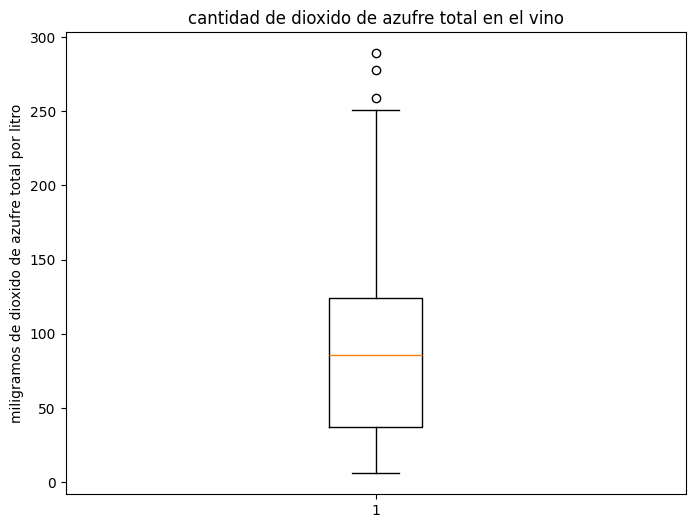

In [426]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["total sulfur dioxide"])
plt.ylabel("miligramos de dioxido de azufre total por litro")
plt.title("cantidad de dioxido de azufre total en el vino")
plt.show()

Podemos observar que las cantidades de dióxido de azufre libre para nuestras muestras de vinos estan en un rango normal

Densidad

In [427]:
# imprimimos las frecuencias absolutas de cada valor de la columna density
preprocessed_dataset["density"].value_counts()

density
0.99680    35
0.99760    31
0.99720    30
0.99800    29
0.99840    25
           ..
0.99081     1
0.99315     1
0.99862     1
0.99848     1
0.99651     1
Name: count, Length: 865, dtype: int64

In [428]:
print("mediana: ", preprocessed_dataset["density"].median())
print("maximo: ", preprocessed_dataset["density"].max())
print("minimo: ", preprocessed_dataset["density"].min())

mediana:  0.9954
maximo:  100.369
minimo:  0.98711


Los valores normales rondan de 0.9 a 1.07 g/cm3, por lo que imputaremos los valores mayores a 1.1 g/cm3 (valor elegido para dejar un margen fuera de lo normal)

In [429]:
aux = preprocessed_dataset[preprocessed_dataset["density"] > 1.1]
aux["density"].value_counts()

density
10.004     7
10.002     7
10.006     5
10.014     5
10.001     4
10.008     3
100.037    2
10.026     2
100.315    2
10.003     2
100.038    2
10.021     1
100.024    1
100.012    1
100.289    1
100.369    1
10.032     1
100.196    1
10.022     1
10.018     1
10.015     1
100.015    1
100.025    1
100.005    1
100.022    1
100.044    1
100.295    1
100.242    1
Name: count, dtype: int64

Viendo el resultado de la busqueda, se concluyo que todos los valores retornados eran imposibles ya que tenian una densidad parecida o mayor a la del mercurio (de 13 g/cm³) y por lo tanto se procedio a cambiarlos por NANs.

In [430]:
preprocessed_dataset["density"] = preprocessed_dataset["density"].where(preprocessed_dataset["density"]<1.1, np.nan)
aux = preprocessed_dataset[preprocessed_dataset["density"] > 1.1]
aux["density"].count()

0

Luego de convertirlos en nans, los reemplazamos por la mediana para poder realizar luego el analisis multivariado. (optamos no eliminarlos para no perder tantas muestras)

In [431]:
preprocessed_dataset['density'] = preprocessed_dataset['density'].fillna(preprocessed_dataset['density'].median())

Una vez reemplazados los valores erroneos procedemos a hacer un boxplot para ver la distribucion de las cantidades de densidad en los vinos.

In [432]:
print("mediana: ", preprocessed_dataset["density"].median())
print("maximo: ", preprocessed_dataset["density"].max())
print("minimo: ", preprocessed_dataset["density"].min())


mediana:  0.99532
maximo:  1.001
minimo:  0.98711


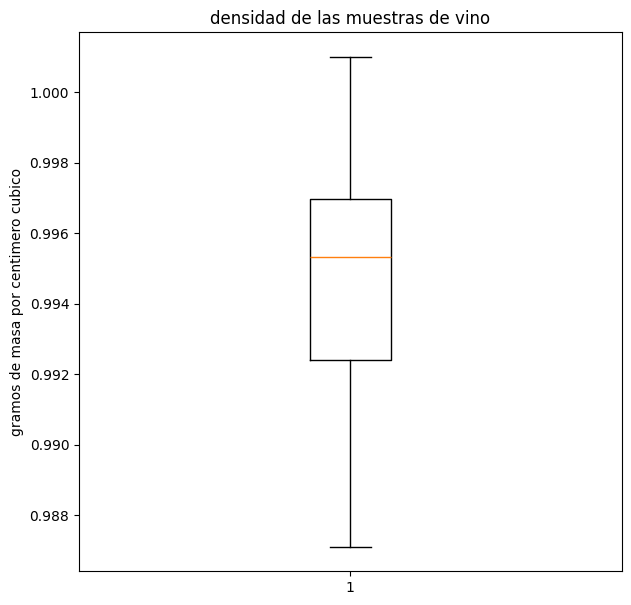

In [433]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.boxplot(preprocessed_dataset["density"])
plt.ylabel("gramos de masa por centimero cubico")
plt.title("densidad de las muestras de vino")
plt.show()

Podemos ver que ahora todos los valores se encuentran dentro del rango normal de valores para la densidad en los vinos y ademas no tenemos ningun outlier

El PH mide el nivel de acidez o alcalinidad del vino. Esta escala va del 0 al 14 siendo 7 el nivel de neutrailidad. El PH normalmente oscila entre 2.8 y 4 para los vinos

In [434]:
# imprimimos las frecuencias absolutas de cada valor de la columna ph
preprocessed_dataset["pH"].value_counts()

pH
3.26    82
3.22    77
3.16    75
3.24    74
3.18    69
        ..
3.74     1
3.85     1
2.82     1
3.70     1
2.80     1
Name: count, Length: 98, dtype: int64

In [435]:
print("mediana: ", preprocessed_dataset["pH"].median())
print("maximo: ", preprocessed_dataset["pH"].max())
print("minimo: ", preprocessed_dataset["pH"].min())


mediana:  3.24
maximo:  4.01
minimo:  2.74


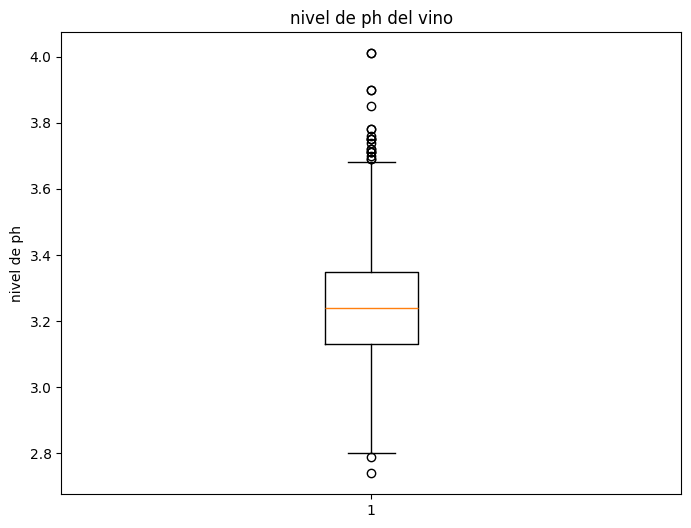

In [436]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.boxplot(preprocessed_dataset["pH"])
plt.ylabel("nivel de ph")
plt.title("nivel de ph del vino")
plt.show()

Se puede observar una distribución de valores normales para el ph segun los estándares.

Analizamos la variable sulphates (sulfatos) que mide la cantidad de gramos de sales de sulfato por litro de vino.

In [437]:
# imprimimos las frecuencias absolutas de cada valor de la columna sulphates 
preprocessed_dataset["sulphates"].value_counts()

sulphates
0.54    105
0.56     99
0.58     88
0.50     87
0.52     85
       ... 
1.98      1
1.09      1
1.61      1
1.31      1
1.33      1
Name: count, Length: 110, dtype: int64

In [438]:
print("mediana: ", preprocessed_dataset["sulphates"].median())
print("maximo: ", preprocessed_dataset["sulphates"].max())
print("minimo: ", preprocessed_dataset["sulphates"].min())

mediana:  0.56
maximo:  2.0
minimo:  0.23


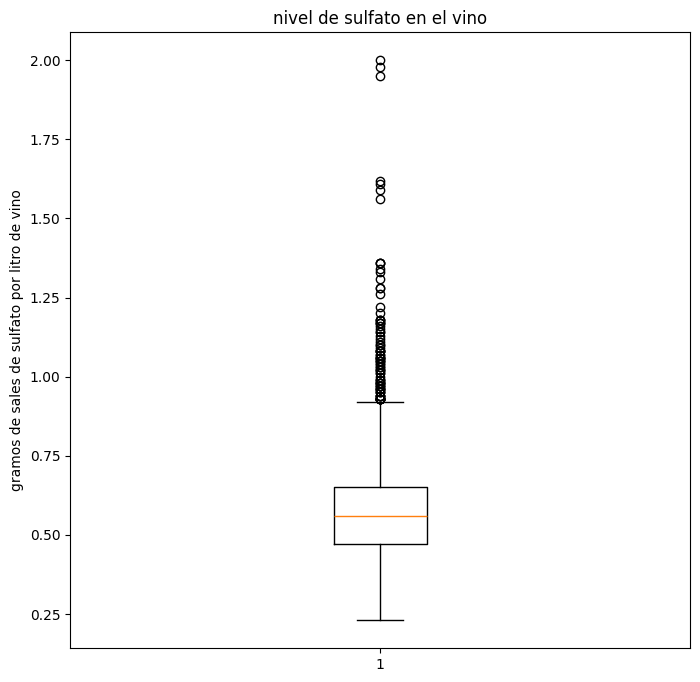

In [439]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.boxplot(preprocessed_dataset["sulphates"])
plt.ylabel("gramos de sales de sulfato por litro de vino")
plt.title("nivel de sulfato en el vino") 
plt.show()

Podemos observar que los valores de las muestras dadas se encuentran dentro de los valores permitidos (hasta 2 g/L)

alcohol; esta variable representa el contenido alcohólico del vino, medido en porcentaje de volumen (% vol). 

Está cargado como tipo object, lo que nos obligará a realizar una revisión sobre éste ya que podría ser que contenga valores no numéricos o datos inconsistentes, por lo que veremos que los datos que contenga sean adecuados para el posterior análisis. 

In [440]:
# imprimimos las frecuencias absolutas de cada valor de la columna alcohol
preprocessed_dataset["alcohol"].value_counts()


alcohol
9.5                    150
9.4                    138
9.2                    101
11                      94
9.8                     91
                      ... 
117.333.333.333.333      1
128.933.333.333.333      1
10.65                    1
109.666.666.666.667      1
10.75                    1
Name: count, Length: 110, dtype: int64

Convertiremos la columna a float, y los valores con los que haya errores los transformará en nans

------Elegimos hacer esto ya que sus posibles valores correctos estan dentro de la distribución normal de valores para los porcentajes de alcohol en los vinos

Para corregir estos valores y convertir la columna a tipo float, reemplazaremos los valores problemáticos, eliminando los puntos adicionales y reubicando el punto decimal:

In [441]:
preprocessed_dataset["alcohol"] = pd.to_numeric(preprocessed_dataset["alcohol"], errors='coerce')

In [442]:
print("mediana: ", preprocessed_dataset["alcohol"].median())
print("maximo: ", preprocessed_dataset["alcohol"].max())
print("minimo: ", preprocessed_dataset["alcohol"].min())

mediana:  10.5
maximo:  14.9
minimo:  8.4


In [443]:
preprocessed_dataset["alcohol"].isna().sum()

32

Tenemos 32 filas en las que el valor del alcohol no ha podido convertirse. Estas conforman el 1.2% total de las muestras del dataset

Reemplazamos estos valores por la mediana del alcohol que es 10.5

In [444]:
preprocessed_dataset['alcohol'] = preprocessed_dataset['alcohol'].fillna(preprocessed_dataset['alcohol'].median())

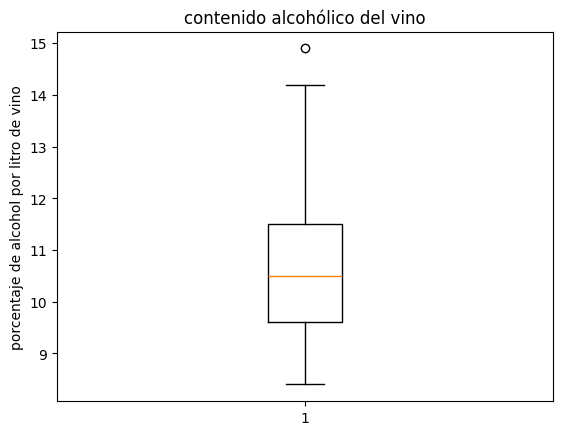

In [445]:
import matplotlib.pyplot as plt

ppdata_sinNaN = preprocessed_dataset["alcohol"].dropna()

plt.boxplot(ppdata_sinNaN)
plt.ylabel("porcentaje de alcohol por litro de vino")
plt.title("contenido alcohólico del vino")
plt.show()

Podemos observar que el contenido alcohólico de todas las muestras está dentro de los valores esperados que iba de 9%VOL a 15%VOL


La variable quality (calidad) representa la puntuación del vino, otorgándole un puntaje que va de 0 a 10 de manera discreta.

In [446]:
# imprimimos las frecuencias absolutas de cada valor de la columna quality
preprocessed_dataset["quality"].value_counts().sort_index()

quality
3      14
4      89
5     898
6    1183
7     409
8      50
Name: count, dtype: int64

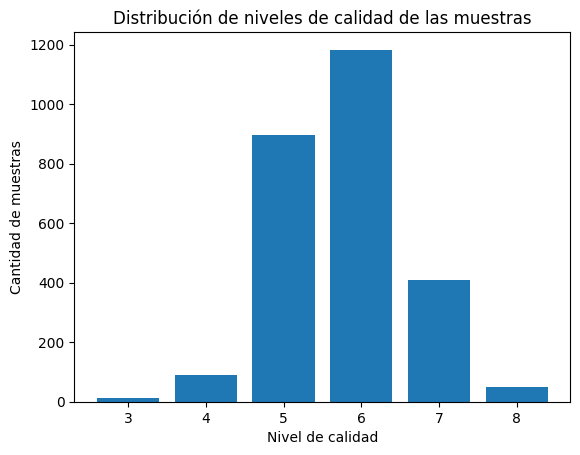

In [447]:
import matplotlib.pyplot as plt

# Contar frecuencias de cada valor de "quality"
conteo_calidad = raw_dataset["quality"].value_counts()

plt.bar(conteo_calidad.index, conteo_calidad.values)
plt.xlabel("Nivel de calidad")
plt.ylabel("Cantidad de muestras")
plt.title("Distribución de niveles de calidad de las muestras")

plt.show()

Podemos ver que se han puntuado más cantidad de vinos con un 6, y que los demas puntajes utilizados para los vinos han sido 3, 4, 5, 7 y 8.

In [448]:
# Identificar valores nulos y duplicados
print("Valores nulos por columna:")
print(preprocessed_dataset.isnull().sum())

print("Número de filas duplicadas:", preprocessed_dataset.duplicated().sum())

Valores nulos por columna:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Número de filas duplicadas: 0


Visualización de distribuciones y outliers: 

<Figure size 1500x1000 with 0 Axes>

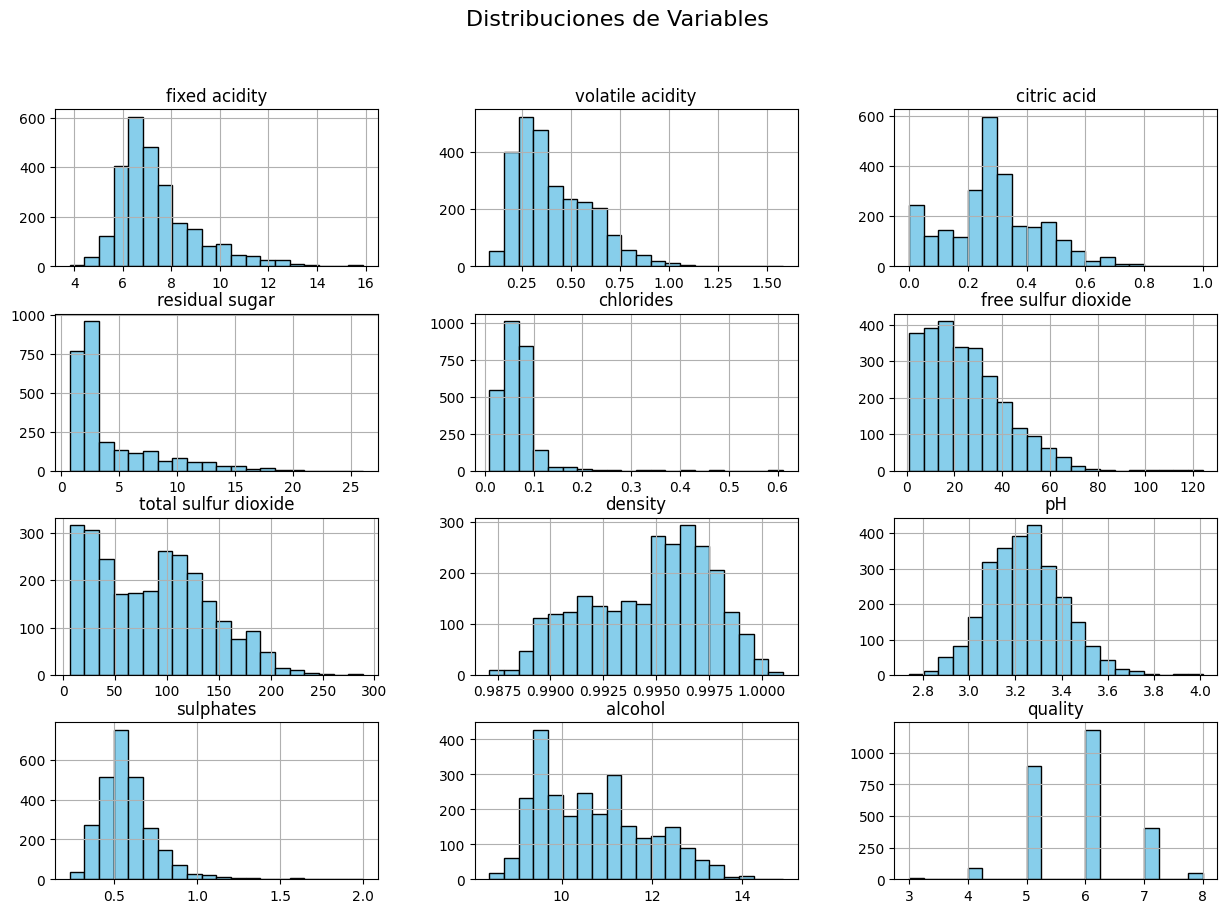

In [449]:
# Visualización de distribuciones y outliers
plt.figure(figsize=(15, 10))
preprocessed_dataset.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribuciones de Variables", fontsize=16)
plt.show()

Análisis bivariado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\2966158406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=preprocessed_dataset, palette="Set3")


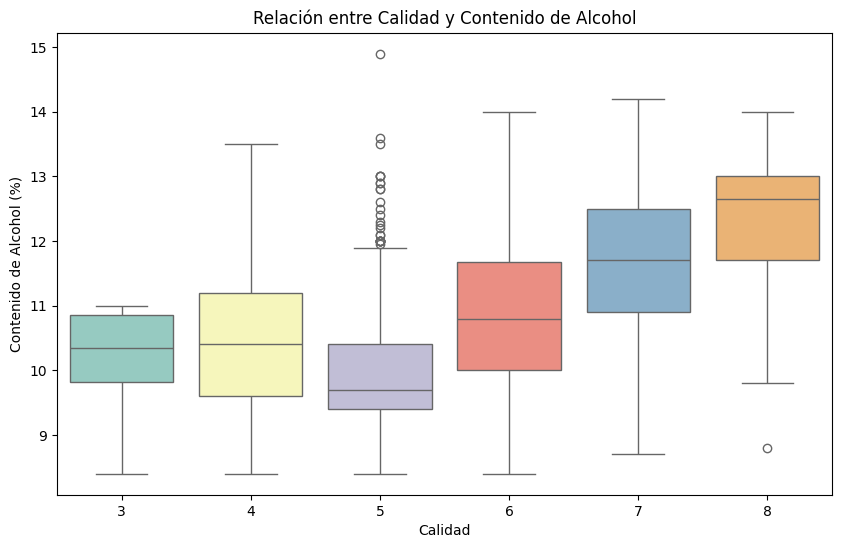

In [450]:
import seaborn as sns
# Relación entre el contenido de alcohol y la calidad del vino
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=preprocessed_dataset, palette="Set3")
plt.title('Relación entre Calidad y Contenido de Alcohol')
plt.xlabel('Calidad')
plt.ylabel('Contenido de Alcohol (%)')
plt.show()

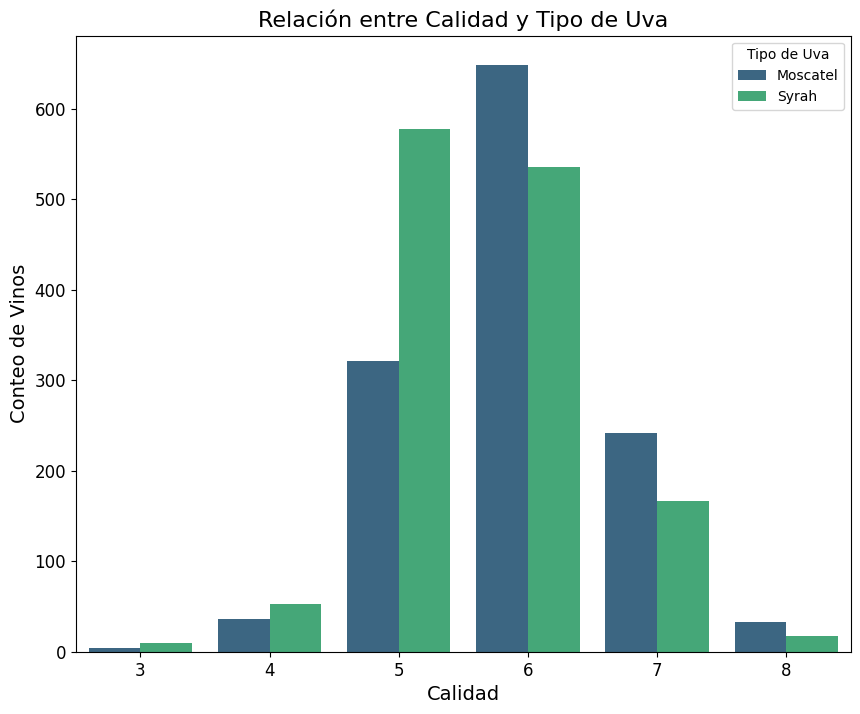

In [451]:
# Ajustar el gráfico de barras agrupadas para la relación entre calidad y tipo de uva
plt.figure(figsize=(10, 8))
sns.countplot(x='quality', hue='type', data=preprocessed_dataset, palette="viridis")
plt.title('Relación entre Calidad y Tipo de Uva', fontsize=16)
plt.xlabel('Calidad', fontsize=14)
plt.ylabel('Conteo de Vinos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tipo de Uva', labels=['Moscatel', 'Syrah'])
plt.show()



Realizamos la matriz de correlación para ver todos los valores de correlación entre todos los posibles pares de variables.

In [452]:
correlation_matrix = preprocessed_dataset.drop(columns=["type"]).corr()
correlation_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.215980     0.424321   
volatile acidity           0.215980          1.000000    -0.432517   
citric acid                0.424321         -0.432517     1.000000   
residual sugar            -0.197348         -0.273037     0.102199   
chlorides                  0.334037          0.343054     0.126615   
free sulfur dioxide       -0.363736         -0.400155     0.078008   
total sulfur dioxide      -0.445188         -0.444936     0.131762   
density                    0.557765          0.404303     0.071290   
pH                        -0.224707          0.397866    -0.409882   
sulphates                  0.385627          0.180752     0.183442   
alcohol                   -0.182173         -0.187217     0.047726   
quality                   -0.065255         -0.349336     0.165395   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.197348   0.334037            -0.363736   
volatile acidity           -0.273037   0.343054            -0.400155   
citric acid                 0.102199   0.126615             0.078008   
residual sugar              1.000000  -0.189586             0.437669   
chlorides                  -0.189586   1.000000            -0.250300   
free sulfur dioxide         0.437669  -0.250300             1.000000   
total sulfur dioxide        0.512602  -0.318494             0.757751   
density                     0.201566   0.434588            -0.219280   
pH                         -0.307080   0.031542            -0.249362   
sulphates                  -0.225021   0.473085            -0.249468   
alcohol                    -0.164127  -0.319030            -0.035266   
quality                     0.023217  -0.216692             0.092013   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.445188  0.557765 -0.224707   0.385627   
volatile acidity                 -0.444936  0.404303  0.397866   0.180752   
citric acid                       0.131762  0.071290 -0.409882   0.183442   
residual sugar                    0.512602  0.201566 -0.307080  -0.225021   
chlorides                        -0.318494  0.434588  0.031542   0.473085   
free sulfur dioxide               0.757751 -0.219280 -0.249362  -0.249468   
total sulfur dioxide              1.000000 -0.297674 -0.339661  -0.336799   
density                          -0.297674  1.000000  0.120028   0.373332   
pH                               -0.339661  0.120028  1.000000   0.126503   
sulphates                        -0.336799  0.373332  0.126503   1.000000   
alcohol                          -0.051149 -0.666897  0.081736  -0.081399   
quality                           0.017077 -0.330873 -0.065398   0.051961   

                       alcohol   quality  
fixed acidity        -0.182173 -0.065255  
volatile acidity     -0.187217 -0.349336  
citric acid           0.047726  0.165395  
residual sugar       -0.164127  0.023217  
chlorides            -0.319030 -0.216692  
free sulfur dioxide  -0.035266  0.092013  
total sulfur dioxide -0.051149  0.017077  
density              -0.666897 -0.330873  
pH                    0.081736 -0.065398  
sulphates            -0.081399  0.051961  
alcohol               1.000000  0.491656  
quality               0.491656  1.000000

Realizamos ahora sobre esta matriz de correlación un heatmap o mapa de calor, para poder visualizar más sencillamente las posibles correlaciones entre los distintos pares de variables

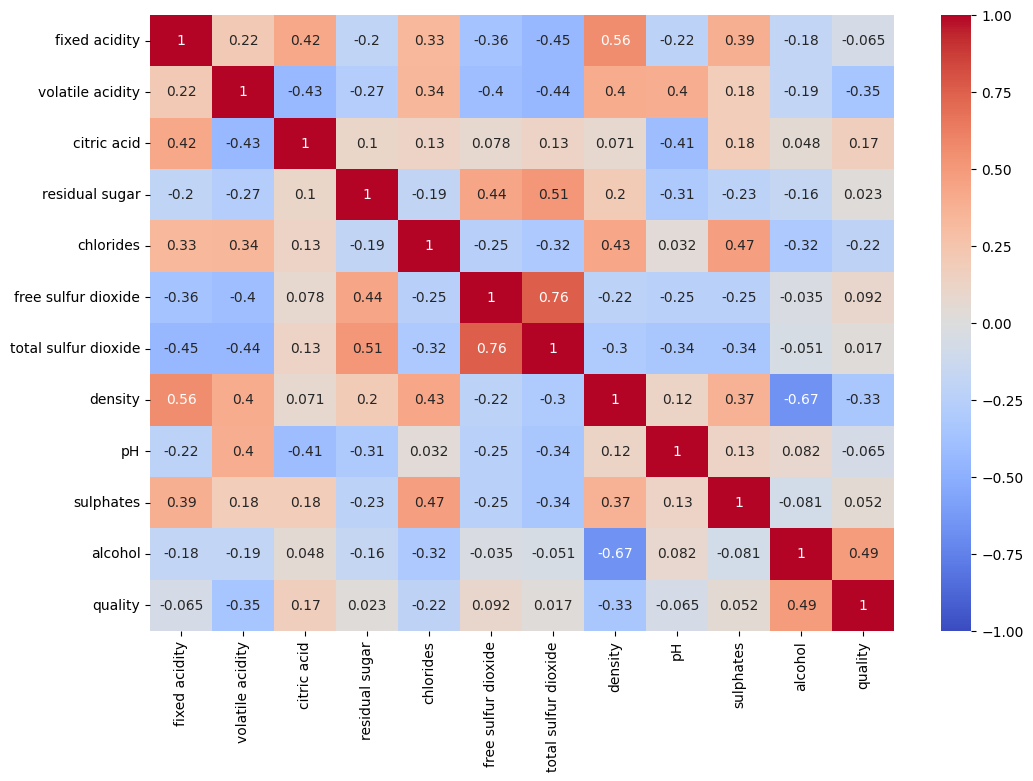

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt

# imprimimos la matriz como un heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Se puede observar una correlación positiva entre alcohol y quality, aunque no muy fuerte, sugiriendo que la calidad del vino aumenta a medida que aumenta el contenido alcohólico. Tambien se ve una correlación negativa entre quality y volatile acidity, y entre quality y density, indicando que un aumento en la acidez volátil tiende a disminuir la calidad, y tambien que a mayor densidad menor calidad.

Density y alcohol tienen una correlación negativa considerable, sugiriendo que vinos con menor densidad tienen a tener mayor contenido alcohólico.

Consideramos altas las correlaciones cuyo valor absoluto sea mayor a 0.5, Podemos visualizar esto más facilmente umbralizando la matriz a ese valor

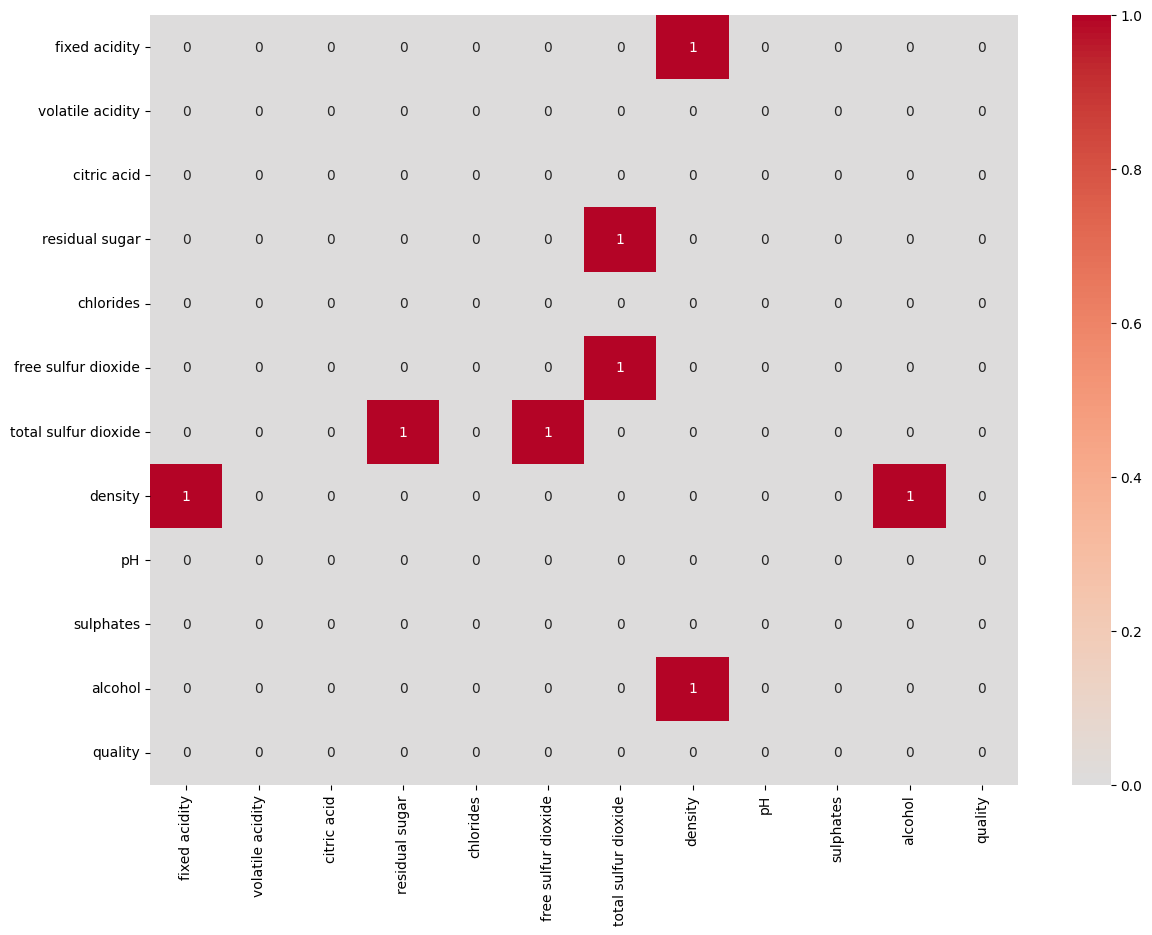

In [454]:
import matplotlib.pyplot as plt
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() >= 0.5
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Para las correlaciones entre pares de variables donde el valor absoluto del coeficiente de correlacion es r > 0.5 realizaremos un gráfico de dispersión o scatterplot

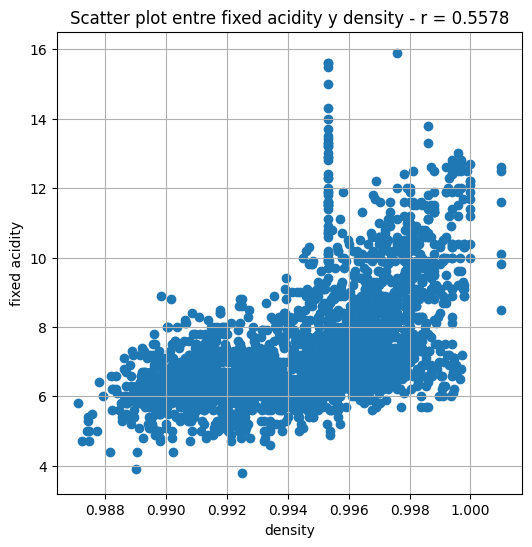

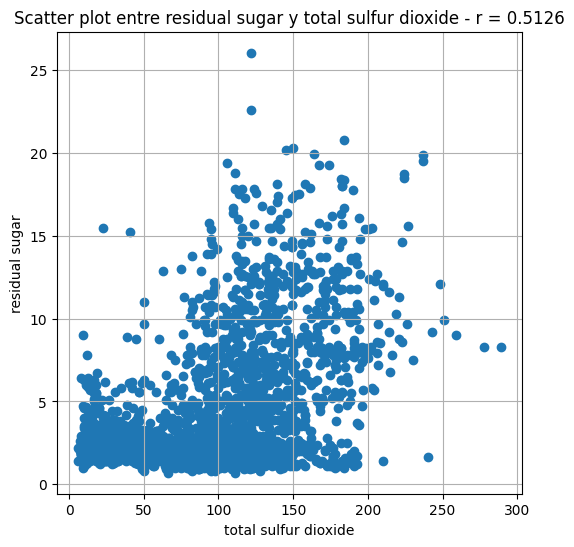

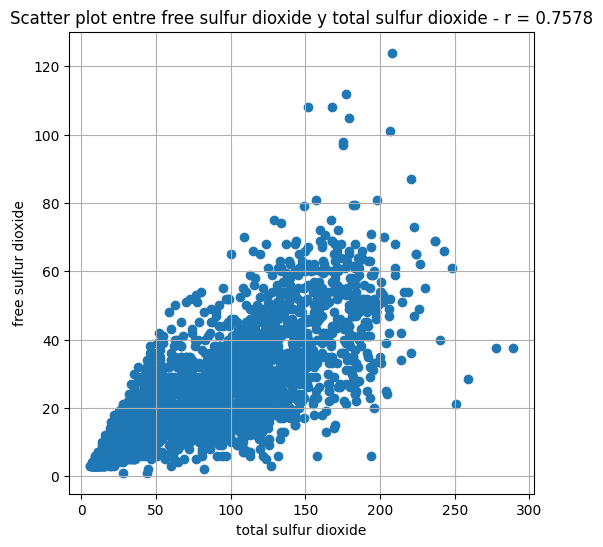

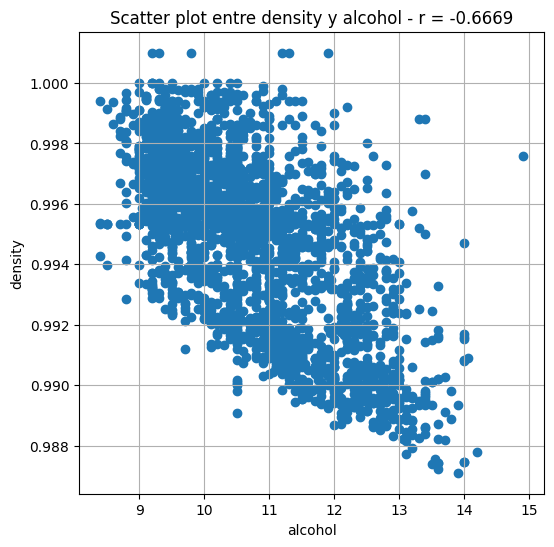

In [455]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

Que la correlación entre free y total sulfur dioxide sea alta es lógico, ya que el dióxido de azufre total incluye el dióxido de azufre libre.

Reducción de dimensionalidad

In [456]:
preprocessed_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2643.000000       2643.000000  2643.000000     2643.000000   
mean        7.427393          0.410967     0.288278        4.145535   
std         1.622016          0.192485     0.159172        3.768908   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.360000     0.290000        2.400000   
75%         8.050000          0.540000     0.370000        5.100000   
max        15.900000          1.580000     1.000000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2643.000000          2643.000000           2643.000000  2643.000000   
mean      0.067198            24.932274             85.851116     0.994729   
std       0.044126            16.440835             53.544991     0.002885   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             37.000000     0.992400   
50%       0.060000            22.000000             86.000000     0.995320   
75%       0.081000            34.000000            124.000000     0.996960   
max       0.611000           124.000000            289.000000     1.001000   

                pH    sulphates      alcohol      quality  
count  2643.000000  2643.000000  2643.000000  2643.000000  
mean      3.242978     0.577923    10.690908     5.769580  
std       0.163125     0.167589     1.201829     0.836496  
min       2.740000     0.230000     8.400000     3.000000  
25%       3.130000     0.470000     9.600000     5.000000  
50%       3.240000     0.560000    10.500000     6.000000  
75%       3.350000     0.650000    11.500000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Podemos ver que hay columnas con desvío estándar muy alto, como free sulfur dioxide, total sulfur dioxide y residual sugar.  Por lo tanto las varianzas tambien son altas.

Procedemos a estandarizar los datos para asi luego realizar reducción de dimensionalidad con PCA.

Lo hacemos porque PCA se basa en la varianza de los datos y, si las variables tienen escalas muy diferentes, aquellas con mayor varianza (y mayor magnitud) tendrán una influencia desproporcionada en los componentes.

Antes de PCA: (2643, 11)
Después de PCA: (2643, 2)


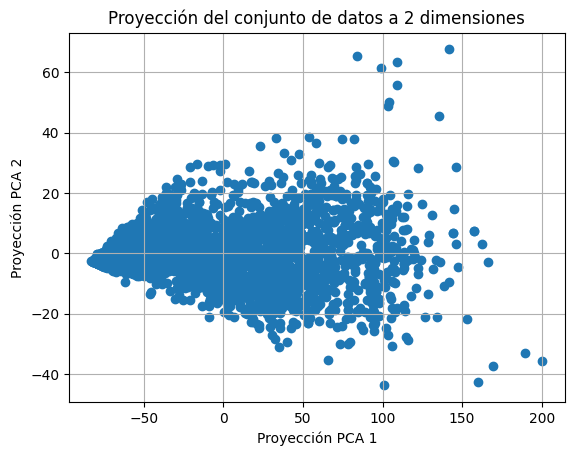

In [457]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#SIN ESTANDARIZAR

X = preprocessed_dataset.drop(columns=['type', 'quality'])
# declaramos un objeto PCA que mapee n dimensions a p=2, y que además
pca = PCA(n_components=2, whiten=False)
# le pedimos al objeto que se ajuste utilizando los datos (fit) y que además
# transforme los datos, para ya reducir a dos dimensiones
principalComponents = pca.fit_transform(X)
# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# graficamos los datos. 
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [458]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = preprocessed_dataset.drop(columns=['type', 'quality'])

# estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(np.std(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


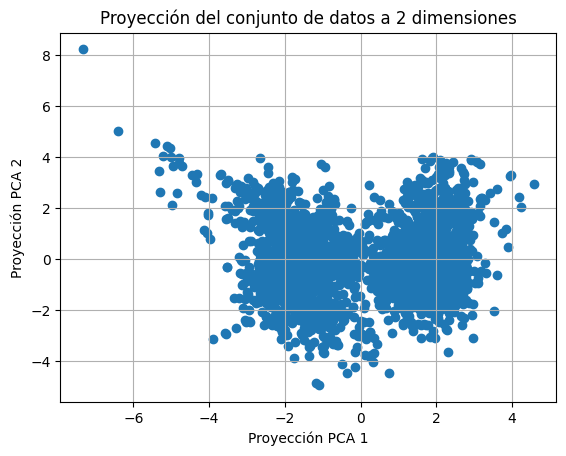

In [459]:
#Aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [460]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  2643 non-null   object 
 1   fixed acidity         2643 non-null   float64
 2   volatile acidity      2643 non-null   float64
 3   citric acid           2643 non-null   float64
 4   residual sugar        2643 non-null   float64
 5   chlorides             2643 non-null   float64
 6   free sulfur dioxide   2643 non-null   float64
 7   total sulfur dioxide  2643 non-null   float64
 8   density               2643 non-null   float64
 9   pH                    2643 non-null   float64
 10  sulphates             2643 non-null   float64
 11  alcohol               2643 non-null   float64
 12  quality               2643 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 289.1+ KB


In [461]:
import pandas as pd

# Mostramos components_ en formato de DataFrame
print("Componentes Principales:")
print(pd.DataFrame(pca.components_))

# Mostramos explained_variance_ como Series
print("\nVarianza Explicada:")
print(pd.Series(pca.explained_variance_))

# Mostramos explained_variance_ratio_ como Series
print("\nRatio de Varianza Explicada:")
print(pd.Series(pca.explained_variance_ratio_))

Componentes Principales:
         0         1         2         3         4         5         6   \
0 -0.329427 -0.352249  0.032487  0.251190 -0.332714  0.378490  0.424774   
1  0.329159 -0.189624  0.434460  0.328051  0.205217  0.191837  0.200597   

         7         8         9        10  
0 -0.338330 -0.184475 -0.311221  0.15331  
1  0.353457 -0.413858  0.154361 -0.34660  

Varianza Explicada:
0    3.566346
1    2.218893
dtype: float64

Ratio de Varianza Explicada:
0    0.324091
1    0.201641
dtype: float64


Los datos obtenidos sobre los componentes principales, la varianza explicada y el ratio de varianza nos indican que nuestro análisis de PCA explica aproximadamente el 52% de la varianza total en el conjunto de datos. Además, observamos que las variables más influyentes en la primera componente principal (en la primera proyección, eje X) son la acidez volátil, la cantidad de dióxido de azufre libre y el total de dióxido de azufre. En la segunda componente principal (eje Y), destacan la cantidad de ácido cítrico, la densidad y el pH como variables predominantes.

In [462]:
df = preprocessed_dataset
df['type_bool'] = df['type'].apply(lambda x: 1 if x == 'Syrah' else 0)

print(df.head())

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates  alcohol  quality  type_bool  
0       0.42     11.8        6          0  
1   

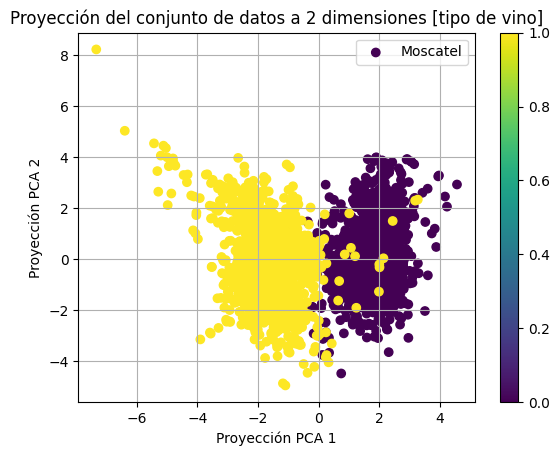

In [463]:
# graficamos los datos. el color de cada punto representa el valor de la calidad
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset['type_bool'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [tipo de vino]')
plt.legend(labels=['Moscatel'])
plt.colorbar()
plt.show()

La proyeccion de PCA permite diferenciar bien los dos grupos de tipos de vino, Moscatel es el de color morado, y Syrah el de amarillo. Estos colores se pueden ver en la escala de la derecha, sabiendo que los Moscatel son 0, y Syrah son 1.

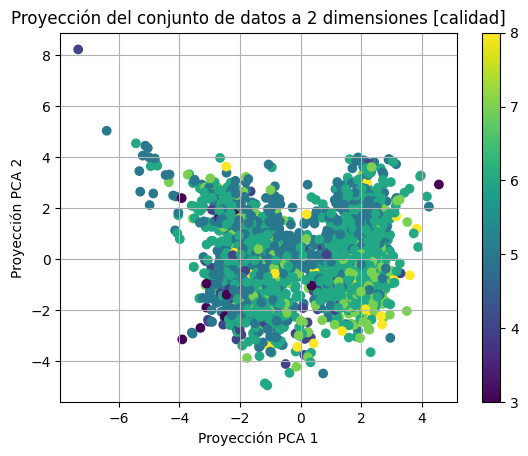

In [464]:
# graficamos los datos. el color de cada punto representa el valor de la calidad
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset["quality"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [calidad]')
plt.colorbar()
plt.show()

No aporta ninguna información significativa, ambos grupos de vinos varian en la calidad. 

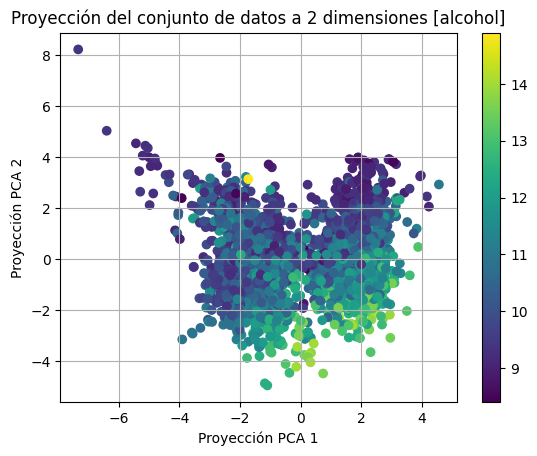

In [465]:
# graficamos los datos. el color de cada punto representa el valor de alcohol
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset["alcohol"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [alcohol]')
plt.colorbar()
plt.show()

Vemos que el alcohol se distribuye de igual manera en ambos tipos de vinos de una manera "decreciente", ya que a menor valor en Y, más contenido alcohólico se encuentra en el vino; y, a medida que se aumenta en el eje Y el contenido alcohólico disminuye

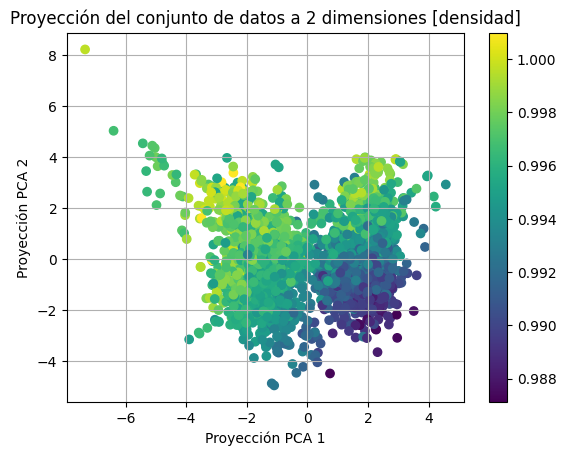

In [466]:
# graficamos los datos. el color de cada punto representa el valor de la densidad
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset["density"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [densidad]')
plt.colorbar()
plt.show()

Podemos observar tambien que la densidad parece distribuirse de la misma manera para ambos tipos de vino pero de manera "creciente", a menor valor en el eje Y menos densidad, y a medida que aumentamos en el eje la densidad tambien aumenta.

Tambien pareciera que los vinos de tipo moscatel suelen tener menor densidad que los de tipo syrah.
- Planteamos una hipótesis: la densidad del vino está relacionada con el tipo de uva usado para su elaboración

Luego de mirar los PCA proyectados con alcohol y densidad, vemos que son inversos entre sí, en la medida que cuanto más alcohol tiene un vino, menos densidad tiene éste. Esto lo podríamos corresponder a la correlación negativa observada anteriormente; entre alcohol y densidad la correlación es de -0.67

- Planteamos una hipótesis: la densidad del vino está relacionada con el contenido alcohólico

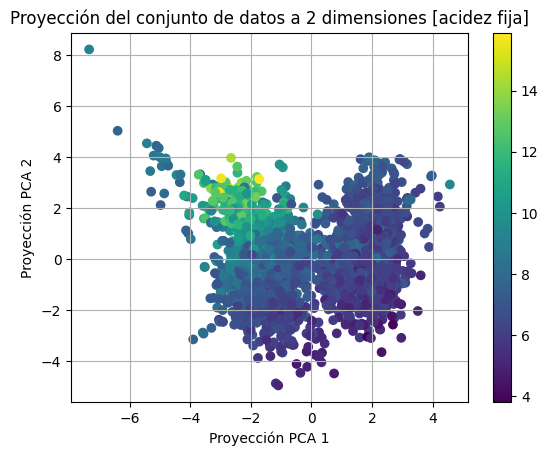

In [467]:
# graficamos los datos. el color de cada punto representa el valor de la acidez fija
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset['fixed acidity'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [acidez fija]')
plt.colorbar()
plt.show()

Podemos observar que los vinos de tipo moscatel, suelen tener menor nivel de acidez fija que los de tipo syrah. 

- Formamos hipótesis: La acidez fija está relacionada con el tipo de uva utilizado para elaborar el vino.

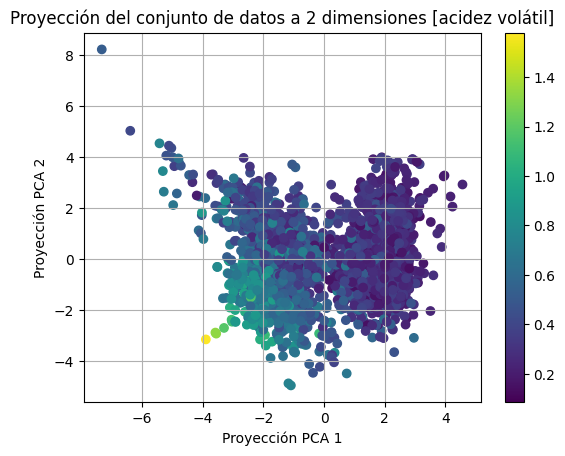

In [468]:
# graficamos los datos. el color de cada punto representa el valor de la acidez volatil
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset['volatile acidity'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [acidez volátil]')
plt.colorbar()
plt.show()

Vemos claramente una diferencia en que el grupo de los vinos moscatel parecen tener menor acidez volatil que los de tipo syrah.

- Hipotesis: la acidez volatil del vino se relaciona con el tipo de uva

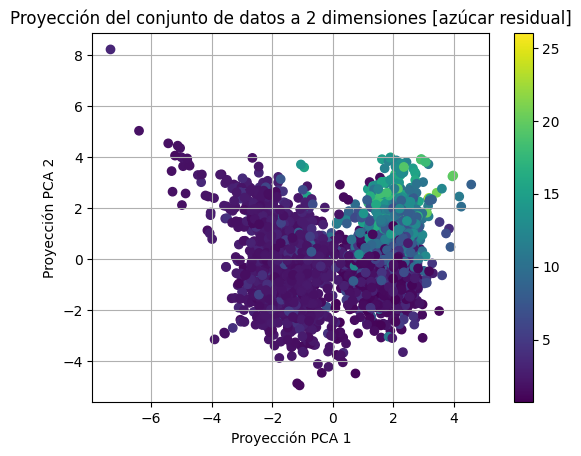

In [469]:
# graficamos los datos. el color de cada punto representa el valor de la azucar residual
plt.scatter(X_pca[:,0], X_pca[:,1], c=preprocessed_dataset['residual sugar'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones [azúcar residual]')
plt.colorbar()
plt.show()

Se puede ver claramente que los vinos de tipo syrah parecen tener menos cantidad de azúcar residual que los del tipo moscatel.

- Una nueva hipótesis: el azúcar residual del vino se relaciona según el tipo usado para su producción

t-SNE

Lo realizamos ya que esté método es capaz de capturar relaciones no lineales en los datos, entonces tal vez podamos ver un poco más de información que en las proyecciones PCA hechas, ya que PCA solo considera relaciones lineales y no puede captar patrones no lineales complejos que puedan estar presentes en los datos. 

Before t-SNE: (2643, 11)
After t-SNE: (2643, 2)


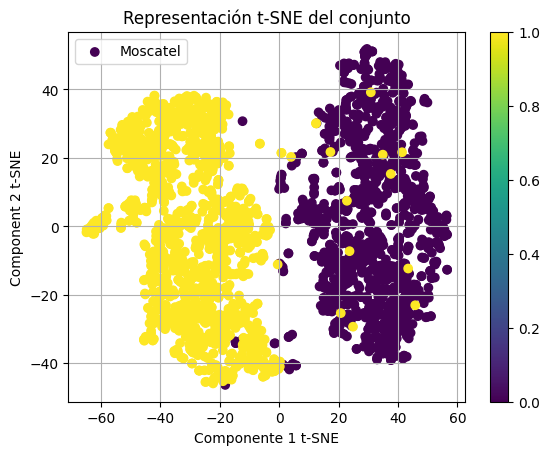

In [470]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["type_bool"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.legend(labels=['Moscatel'])
plt.colorbar()
plt.show()

Al observar la representación t-SNE vemos dos grupos de vinos aún más separados según los tipos de uva. Pero consideramos que no se agrega ningún tipo de información extra al análisis hecho con PCA. 

Before t-SNE: (2643, 11)
After t-SNE: (2643, 2)


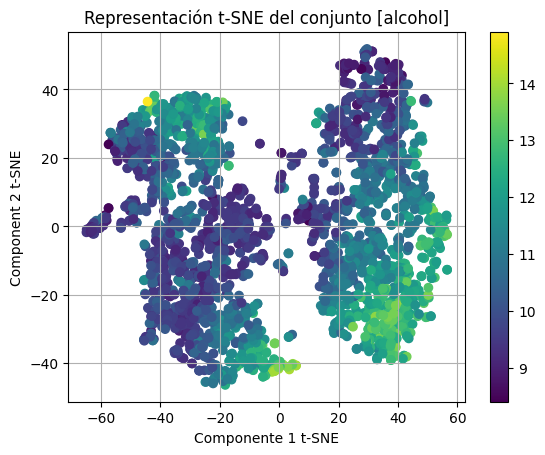

In [471]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["alcohol"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto [alcohol]')
plt.colorbar()
plt.show()

Se puede observar mayor diferencia en el contenido alcoholico que tienen los distintos tipos de vinos. Los moscatel parecen tener más cantidades de vinos producidos con contenido alcohólico alto, mientras que parecen haber más vinos de tipo syrah con poco contenido alcohólico.

- Hipotesis: el contenido alcohólico del vino depende del tipo de uva utilizada

Before t-SNE: (2643, 11)
After t-SNE: (2643, 2)


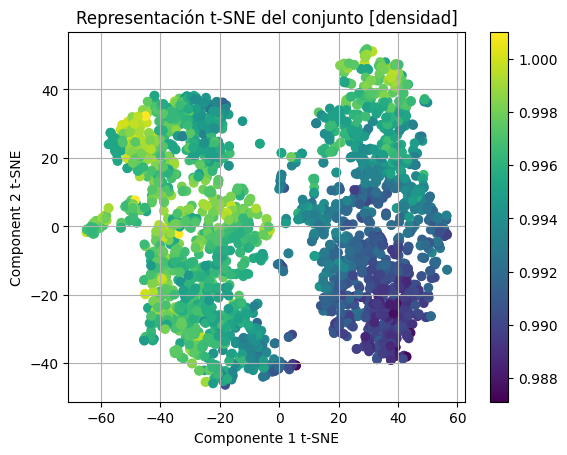

In [472]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["density"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto [densidad]')
plt.colorbar()
plt.show()

Seguimos viendo que parece haber más cantidad de vinos moscatel con menor densidad.

Before t-SNE: (2643, 11)
After t-SNE: (2643, 2)


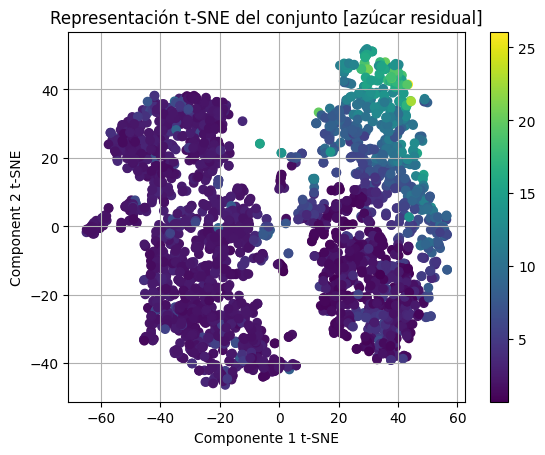

In [473]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["residual sugar"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto [azúcar residual]')
plt.colorbar()
plt.show()

Se puede observar que se resalta la diferencia de la cantidad de azucar residual según el tipo de vino

Before t-SNE: (2643, 11)
After t-SNE: (2643, 2)


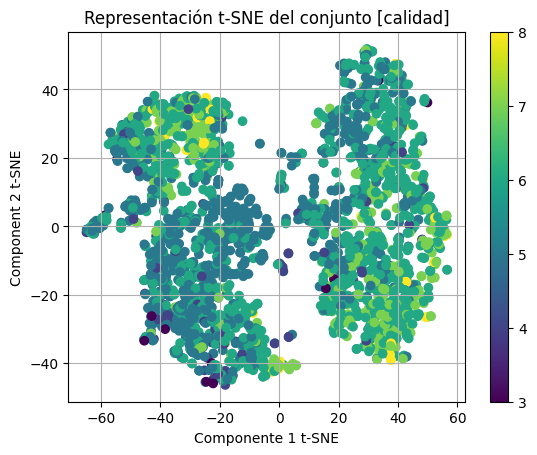

In [474]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["quality"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto [calidad]')
plt.colorbar()
plt.show()

No se aporta más información sobre la calidad

A continuación realizaremos un clustering basado en algunas características químicas de los vinos.

cluster  quality
0        3            9
         4           53
         5          498
         6          284
         7           23
1        3            2
         4           23
         5          137
         6          459
         7          236
         8           34
2        3            2
         4            7
         5          173
         6          237
         7           30
         8            3
3        3            1
         4            6
         5           90
         6          203
         7          120
         8           13
dtype: int64


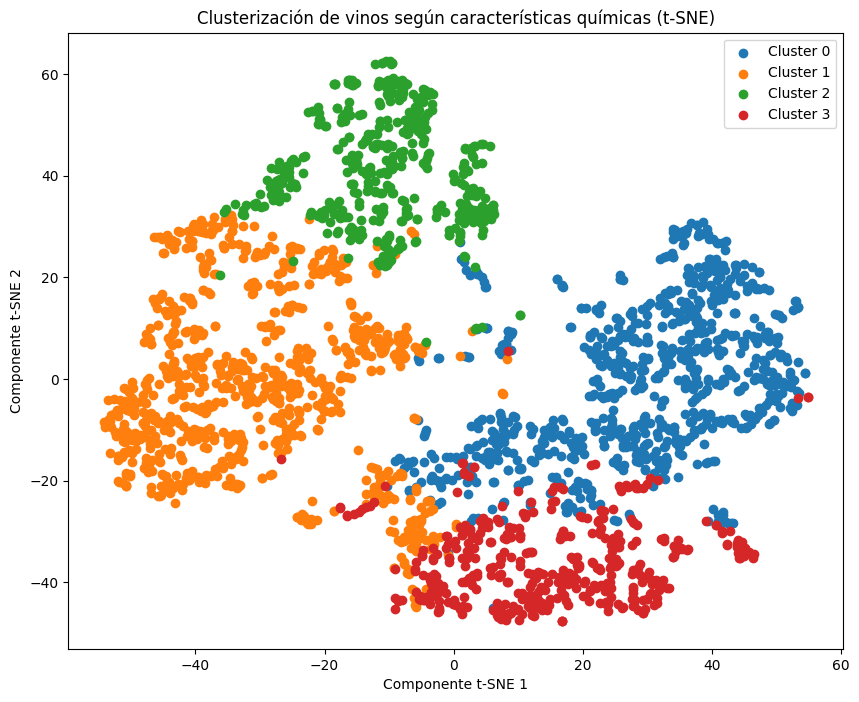

In [475]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Seleccionamos las características relevantes para la clusterización
df = preprocessed_dataset
features = df[['alcohol', 'volatile acidity', 'sulphates', 'residual sugar', 'chlorides', 'density']]

# Escalamos los datos para normalizar las unidades
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicamos K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)
clusters = kmeans.labels_

# Agregar los clusters al DataFrame original
df['cluster'] = clusters

# Visualizar los clusters según la calidad del vino
print(df.groupby(['cluster', 'quality']).size())

# Visualización de los clusters en con t-SNE
X_2d = TSNE(n_components=2, random_state=42).fit_transform(scaled_features)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({
    'x': X_2d[:, 0],
    'y': X_2d[:, 1],
    'Cluster': clusters,
    'Quality': df['quality']
})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
    plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Clusterización de vinos según características químicas (t-SNE)')
plt.legend()
plt.show()


In [476]:
# Seleccionar solo las columnas numéricas para evitar el error
df_numeric = df.select_dtypes(include=['number'])

# Agrupar el dataset por los clusters y calcular el promedio de cada característica
cluster_means = df_numeric.groupby(df['cluster']).mean()

# Mostrar los promedios para analizar las diferencias químicas
print(cluster_means)


         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.926413          0.598599     0.205444        2.493137   
1             6.537486          0.296773     0.293726        3.037991   
2             6.614159          0.277909     0.319558       11.016482   
3             9.108314          0.409145     0.410277        2.560739   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.085080            16.907728             54.324683  0.996618   
1         0.041744            28.908530            106.287318  0.991369   
2         0.049436            41.089602            147.464602  0.995926   
3         0.102309            15.951501             42.607390  0.996611   

               pH  sulphates    alcohol   quality  type_bool  cluster  
cluster                               

En el Cluster 0 encontramos las siguientes características: acidez volátil alta y una baja cantidad de azúcares residuales. Casi todos los vinos en este cluster son de tipo syrah. Poco contenido de alcohol. Su calidad promedio es 5.3. Por todo esto parece que este cluster probablemente agrupa a vinos syrah de menor calidad, con menos alcohol y alta acidez volátil.

En el cluster 1 encontramos vinos mayoritariamente moscatel con baja acidez volátil, mayor nivel de azúcar residual y el más bajo en cloruros. El contenido de alcohol es el mayor entre todos los clusters. Su calidad promedio es 6.1. Parece que este cluster representa vinos moscatel de alta calidad, con niveles de alcohol altos y bajo contenido de cloruros y acidez volátil.

En el Cluster 2 vemos que hay un alto contenido de azúcar residual, y el mayor nivel de dióxido de azufre total. Son principalmente moscatel. Su contenido de alcohol es bajo al igual que la calidad de éstos. Este cluster agrupa vinos moscatel más dulces y con alta cantidad de dióxido de azufre, pero con una calidad moderada.

Por último en el Cluster 3 tenemos alta acidez fija, y el mayor nivel de sulfatos. Casi todos los vinos son syrah. La calidad promedio es media; 6.1. Este cluster parece agrupar vinos syrah de media calidad, con alta acidez y contenido de sulfatos, y un nivel alto de alcohol.

Este análisis sugiere que existen diferencias significativas entre los tipos de vinos syrah y moscatel según la composición química y calidad en éstos. 

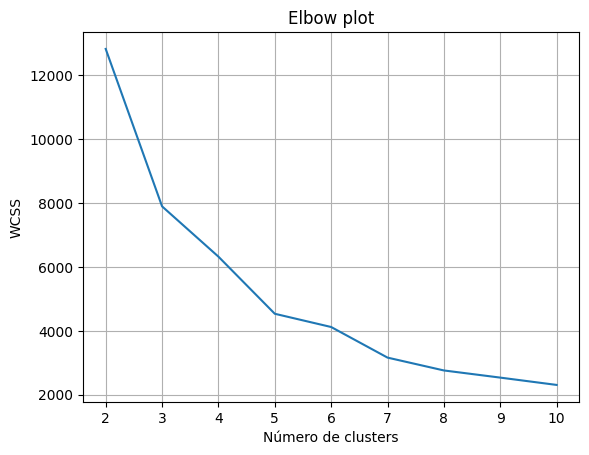

In [477]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Parece que el k elegido (k=4) no fue una mala elección, aunque el óptimo podría ser 5, que es cuando la curva deja de disminuir más rapidamente

---------

A continuación estudiaremos algunas de las hipótesis planteadas

Hipotesis 1: la acidez fija está relacionada con el tipo de uva utilizado para elaborar el vino

In [478]:
df = preprocessed_dataset
df['type_bool'] = df['type'].apply(lambda x: 1 if x == 'Syrah' else 0)

print(df.head())

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates  alcohol  quality  type_bool  cluster  
0       0.42     11.8        6         

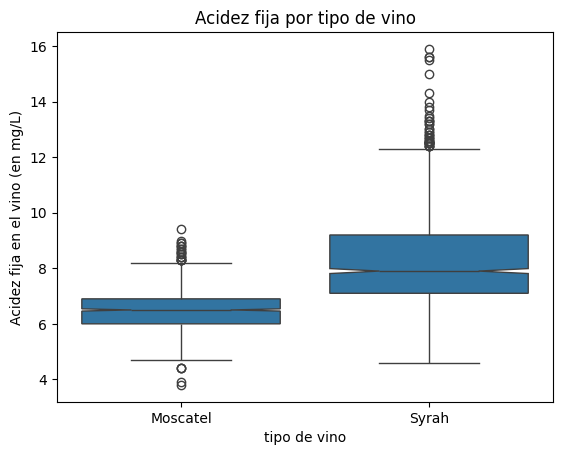

In [479]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='type_bool', y='fixed acidity', data=preprocessed_dataset, notch=True)
plt.title("Acidez fija por tipo de vino")
plt.xlabel("tipo de vino")
plt.xticks(ticks=[0, 1], labels=["Moscatel", "Syrah"])
plt.ylabel("Acidez fija en el vino (en mg/L)")
plt.show()

Se puede ver una diferencia pronunciada entre los vinos en los que se usaron uvas de tipo moscatel y los que producieron con tipo syrah. 

Realizamos un test para muestras independientes, evaluando previamente los supuestos de Independencia, Normalidad, y homocedasticidad

Independencia: son independientes porque se compara la acidez fija entre los dos distintos tipos. Los datos de un grupo (moscatel) no se relacionan con los del otro grupo (syrah). 

Normalidad: verificamos normalidad con test de shapiro wilk:

In [480]:
from scipy.stats import shapiro

#Separamos los datos en dos grupos segun el tipo de vino
tipo_moscatel = preprocessed_dataset[preprocessed_dataset['type'] == 'Moscatel']['fixed acidity']
tipo_syrah = preprocessed_dataset[preprocessed_dataset['type'] == 'Syrah']['fixed acidity']

# Test de Shapiro-Wilk para vinos de tipo moscatel
stat, p = shapiro(tipo_moscatel)
print(f"Test de Shapiro-Wilk para vinos moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de tipo syrah
stat, p = shapiro(tipo_syrah)
print(f"Test de Shapiro-Wilk para vinos syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para vinos moscatel: Estadístico=0.989, p-valor=0.000
Test de Shapiro-Wilk para vinos syrah: Estadístico=0.947, p-valor=0.000


In [481]:
#TEST DE KOLMOGOROV-SMIRNOV
from scipy.stats import kstest

# Test de Kolmogorov-Smirnov para vinos de tipo moscatel
stat, p = kstest(tipo_moscatel, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Kolmogorov-Smirnov para vinos de tipo syrah
stat, p = kstest(tipo_syrah, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Kolmogorov-Smirnov para vinos moscatel: Estadístico=1.000, p-valor=0.000
Test de Kolmogorov-Smirnov para vinos syrah: Estadístico=1.000, p-valor=0.000


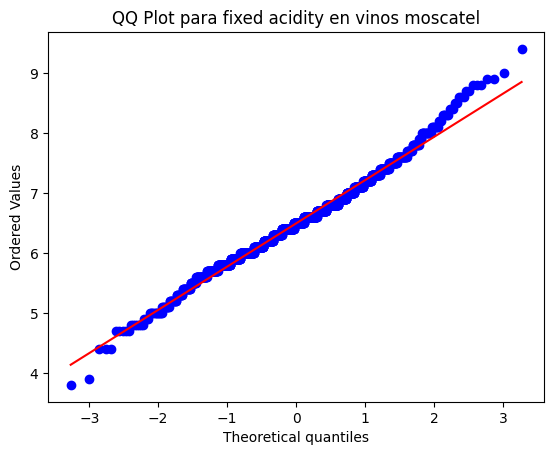

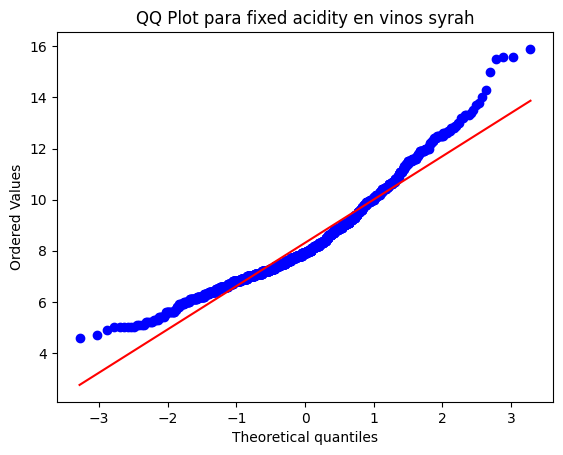

In [482]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(tipo_moscatel, dist="norm", plot=plt)
plt.title("QQ Plot para fixed acidity en vinos moscatel")
plt.show()

stats.probplot(tipo_syrah, dist="norm", plot=plt)
plt.title("QQ Plot para fixed acidity en vinos syrah")
plt.show()


Los datos no siguen una distribución normal, por lo que no se puede usar un test t.

Verificamos homocedasticidad (homogeneidad de varianzas) con el test de Levene

In [483]:
stat, p = stats.levene(tipo_moscatel, tipo_syrah)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=458.030, p-valor=0.000


Los datos no son homocedasticos. Por lo que no podemos usar mann whitney U

Validamos la hipótesis con Kruskal-Wallis: 

In [484]:
# Test de Kruskal-Wallis para comparar fixed acidity entre el tipo de uva moscatel y syrah
stat, p = stats.kruskal(tipo_moscatel, tipo_syrah)
print(f"Test de Kruskal-Wallis para fixed acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la acidez fija entre el tipo moscatel y el tipo syrah.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la acidez fija entre el tipo moscatel y el tipo syrah.")

Test de Kruskal-Wallis para fixed acidity: Estadístico=1005.241, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la acidez fija entre el tipo moscatel y el tipo syrah.


Con un p-valor de 0.000 en el test de kruskal-wallis, se rechaza la hipótesis nula de que no hay diferencia en la acidez fija entre los tipos utilizados moscatel y syrah. Por lo tanto, la acidez fija es significativamente diferente entre los dos tipos de vino.

Hay evidencia suficiente para afirmar que existe una diferencia significativa en la acidez fija entre los vinos moscatel y syrah. Se apoya la hipótesis alternativa de que los tipos de vino tienen acidez fija diferente

---------

Hipotesis 2: La graduación alcohólica del vino se relaciona con el tipo de uva utilizada.

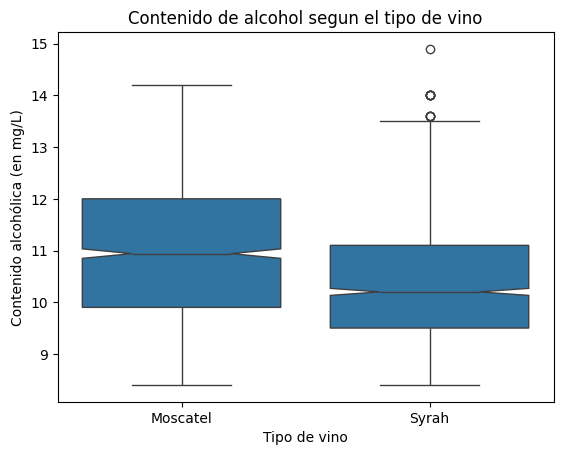

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='type_bool', y='alcohol', data=preprocessed_dataset, notch=True)
plt.title("Contenido de alcohol segun el tipo de vino")
plt.xlabel("Tipo de vino")
plt.xticks(ticks=[0, 1], labels=["Moscatel", "Syrah"])
plt.ylabel("Contenido alcohólica (en mg/L)")
plt.show()


Se puede ver que ambos tipos de vinos presentan distribuciones de alcohol similares.

Verificamos la normalidad de los datos con el test de Shapiro-wilk: 

In [486]:
from scipy.stats import shapiro

#Separamos los datos en dos grupos segun el tipo de vino
tipo_moscatel = preprocessed_dataset[preprocessed_dataset['type'] == 'Moscatel']['alcohol']
tipo_syrah = preprocessed_dataset[preprocessed_dataset['type'] == 'Syrah']['alcohol']

# Test de Shapiro-Wilk para vinos moscatel
stat, p = shapiro(tipo_moscatel)
print(f"Test de Shapiro-Wilk para vinos moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos syrah
stat, p = shapiro(tipo_syrah)
print(f"Test de Shapiro-Wilk para vinos syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para vinos moscatel: Estadístico=0.977, p-valor=0.000
Test de Shapiro-Wilk para vinos syrah: Estadístico=0.928, p-valor=0.000


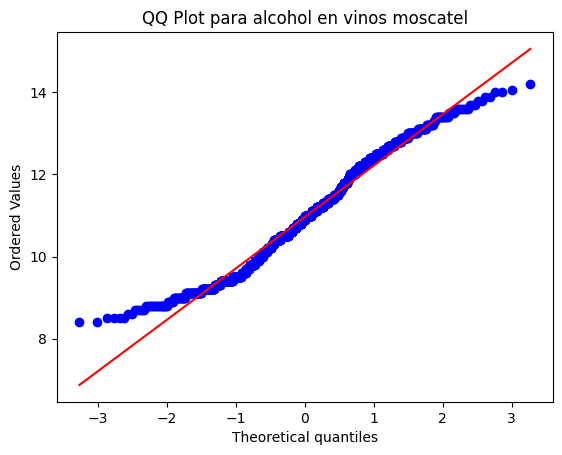

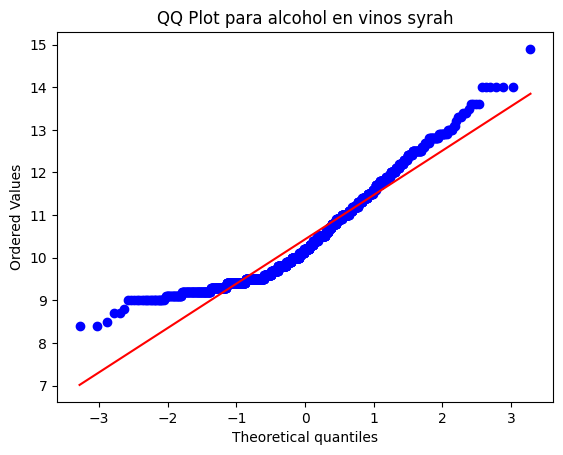

In [487]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para alcohol en tipos moscatel
stats.probplot(tipo_moscatel, dist="norm", plot=plt)
plt.title("QQ Plot para alcohol en vinos moscatel")
plt.show()

# QQ plot para alcohol en tipos syrah
stats.probplot(tipo_syrah, dist="norm", plot=plt)
plt.title("QQ Plot para alcohol en vinos syrah")
plt.show()

Los datos no siguen una distribución normal. 

Verificamos homocedasticidad (homogeneidad de varianzas), con el test de Levene

In [488]:
stat, p = stats.levene(tipo_moscatel, tipo_syrah)
print(f"Test de Levene para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol: Estadístico=46.710, p-valor=0.000


Los datos no son homocedásticos. 

Validamos la hipótesis con el test de Kruskal-Wallis. Este test no requiere ni homocedasticidad ni normalidad de los datos

In [489]:
# Test de Kruskal-Wallis para comparar alcohol entre el tipo de uva moscatel y syrah
stat, p = stats.kruskal(tipo_moscatel, tipo_syrah)
print(f"Test de Kruskal-Wallis para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el alcohol entre el tipo moscatel y el tipo syrah.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el alcohol entre el tipo moscatel y el tipo syrah.")

Test de Kruskal-Wallis para alcohol: Estadístico=123.588, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el alcohol entre el tipo moscatel y el tipo syrah.


El test nos indica que hay una diferencia significativa en el contenido alcohólico presente en los vinos elaborados según los distintos tipos de uva, por lo tanto se rechaza la hipótesis nula de que no hay una diferencia significativa en la graduacion alcoholica entre ambos tipos.

----------

Hipotesis 3: la densidad del vino varía segun el tipo de uva utilizado para su elaboracion.

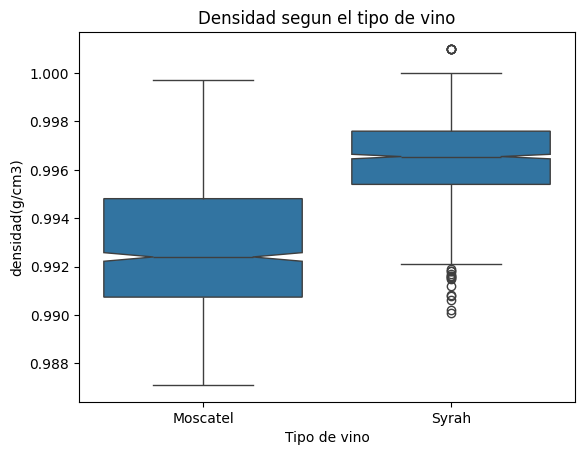

In [490]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='type_bool', y='density', data=preprocessed_dataset, notch=True)
plt.title("Densidad segun el tipo de vino")
plt.xlabel("Tipo de vino")
plt.xticks(ticks=[0, 1], labels=["Moscatel", "Syrah"])
plt.ylabel("densidad(g/cm3)")
plt.show()

Parece haber una diferencia pronunciada en la densidad del vino según fueron producidos con uvas de tipo moscatel o de tipo syrah


Realizamos un test para muestras independientes, evaluando la independencia, normalidad y homocedasticidad.

Independencia: son independientes porque se compara la densidad entre dos distintos tipos de vinos no relacionados entre sí.

Normalidad: la verificamos a continuación con el test de shapiro-wilk

In [491]:
from scipy.stats import shapiro

#Separamos los datos en dos grupos segun el tipo de vino
tipo_moscatel = preprocessed_dataset[preprocessed_dataset['type'] == 'Moscatel']['density']
tipo_syrah = preprocessed_dataset[preprocessed_dataset['type'] == 'Syrah']['density']

# Test de Shapiro-Wilk para vinos moscatel
stat, p = shapiro(tipo_moscatel)
print(f"Test de Shapiro-Wilk para vinos moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos syrah
stat, p = shapiro(tipo_syrah)
print(f"Test de Shapiro-Wilk para vinos syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para vinos moscatel: Estadístico=0.970, p-valor=0.000
Test de Shapiro-Wilk para vinos syrah: Estadístico=0.991, p-valor=0.000


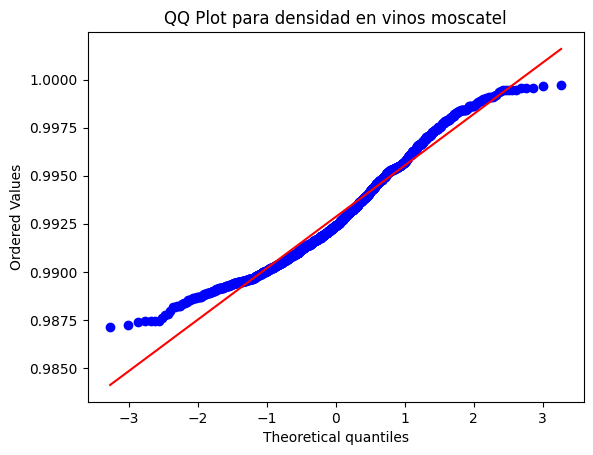

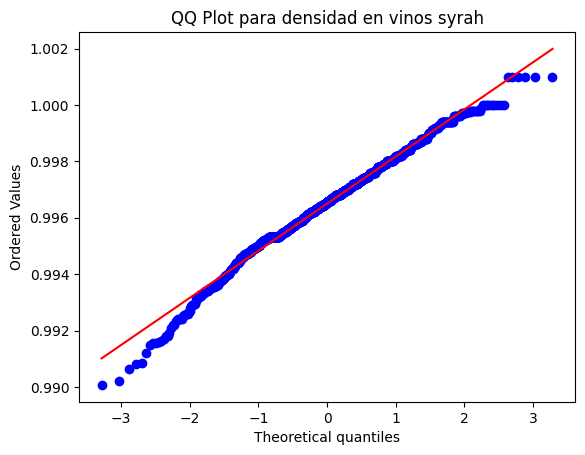

In [492]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para alcohol en tipos moscatel
stats.probplot(tipo_moscatel, dist="norm", plot=plt)
plt.title("QQ Plot para densidad en vinos moscatel")
plt.show()

# QQ plot para alcohol en tipos syrah
stats.probplot(tipo_syrah, dist="norm", plot=plt)
plt.title("QQ Plot para densidad en vinos syrah")
plt.show()

Por el test de shapiro-Wilk y los QQ-PLOT vistos sabemos ahora que los datos no siguen una distribución normal. 

Ahora verificamos homocedasticidad con el test de Levene:

In [493]:
stat, p = stats.levene(tipo_moscatel, tipo_syrah)
print(f"Test de Levene para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol: Estadístico=302.013, p-valor=0.000


Los datos no son homocedásticos.

Validamos la hipótesis con Kruskal-Wallis:

In [494]:
# Test de Kruskal-Wallis para comparar densidad entre el tipo de uva moscatel y syrah
stat, p = stats.kruskal(tipo_moscatel, tipo_syrah)
print(f"Test de Kruskal-Wallis para la densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la densidad entre el tipo moscatel y el tipo syrah.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la densidad entre el tipo moscatel y el tipo syrah.")


Test de Kruskal-Wallis para la densidad: Estadístico=1020.589, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la densidad entre el tipo moscatel y el tipo syrah.


Rechazamos la hipótesis nula de que no hay diferencias en la densidad entre los distintos tipos de uva. Podemos afirmar que hay una diferencia significativa de la densidad entre ambos, y que pareciera según el gráfico donde comparamos ambos boxplots, que los vinos de tipo syrah suelen tener mayor densidad. Aunque  igualmente esto no lo comprobamos.

---------

Hipotesis 4: la densidad está relacionada con el contenido alcohólico. Se puede predecir la densidad a partir del contenido alcohólico.

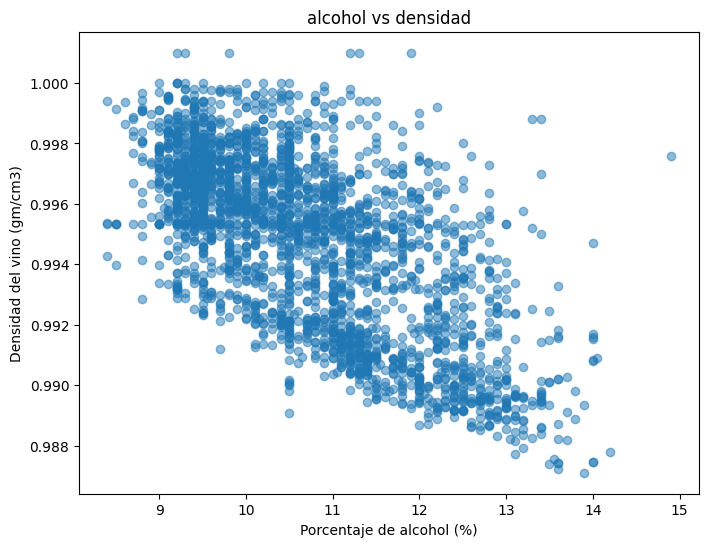

In [495]:
plt.figure(figsize=(8, 6))
plt.scatter(preprocessed_dataset['alcohol'], preprocessed_dataset['density'], alpha=0.5)
plt.xlabel('Porcentaje de alcohol (%)')
plt.ylabel('Densidad del vino (gm/cm3)')
plt.title('alcohol vs densidad')
plt.show()

In [496]:
import numpy as np
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = preprocessed_dataset['alcohol']
# y nuestra variable objetivo (variable dependiente)
y = preprocessed_dataset['density']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     2115.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:46:20   Log-Likelihood:                 12485.
No. Observations:                2643   AIC:                        -2.497e+04
Df Residuals:                    2641   BIC:                        -2.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0118      0.000   2702.302      0.0

Con el coeficiente de determinación R², observamos que se explica aproximadamente el 44.5% de la varianza de 'density' a partir de 'alcohol'. Si bien el alcohol puede ser un buen predictor de la densidad, aún queda mucha varianza sin explicar.

El estadístico F nos dice que el modelo es significativo, ya que como su p-valor es muy pequeño entonces alcohol es útil para predecir la densidad con una confianza estadísticamente alta.

El p-valor de alcohol indica una asociación entre las variables.

El p-valor de Omnibus (0.000) y de Jarque-Bera (prácticamente cero) nos dicen que los residuos no son normales. Por lo tanto no se cumple el supuesto. Se descarta la hipótesis de usar alcohol como predictor de density.

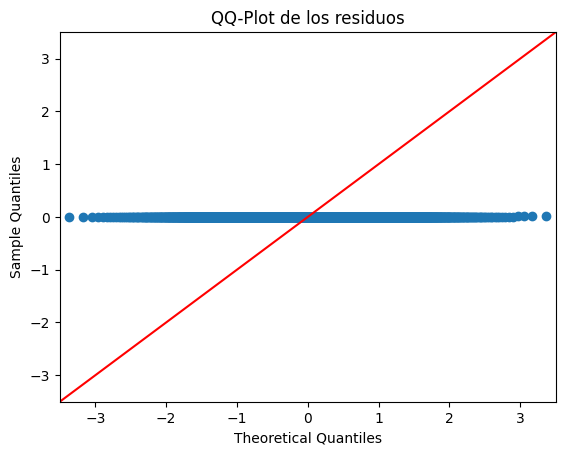

In [497]:
# QQ-Plot para ver que los residuos no siguen una distribución normal
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

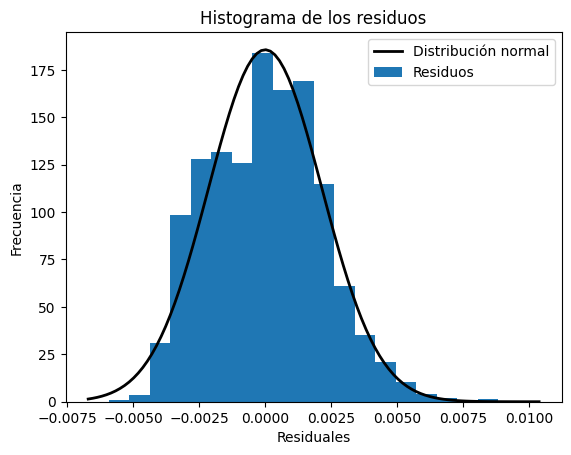

In [498]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

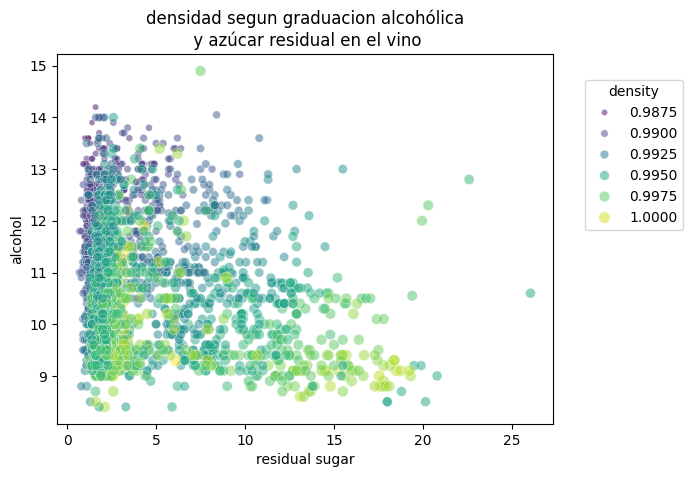

In [499]:
import seaborn as sns

sns.scatterplot(data=preprocessed_dataset, x="residual sugar", y="alcohol",
                size="density", hue="density",
                palette="viridis", alpha=0.5)
plt.legend(title="density", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("densidad segun graduacion alcohólica\n y azúcar residual en el vino")

In [500]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

aux_data = preprocessed_dataset.drop("type", axis=1)

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = aux_data.drop('density', axis=1)
y = aux_data['density']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

import pandas as pd

# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(pd.DataFrame(X).describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       7.427393          0.410967     0.288278        4.145535   0.067198   
std        1.622016          0.192485     0.159172        3.768908   0.044126   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
mean            24.932274             85.851116  3.242978   0.577923   
std             16.440835             53.544991  0.163125   0.167589   

        alcohol   quality  type_bool   cluster  
mean  10.690908  5.769580   0.514188  1.170639  
std    1.201829  0.836496   0.499893  1.060980  

Medias y desviaciones estándar después del escalado:
      fixed acidity  volatile acidity   citric acid  residual sugar  \
mean  -4.731575e-16      8.602863e-17  2.580859e-16   -4.301432e-17   
std    1.000189e+00      1.000189e+00  1.000189e+00    1.000189e+00   

         chlorides  free sulfur dioxide  total sulfur dioxide            

In [501]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Asegurarnos de que los índices de X_scaled_df y 'y' estén alineados
X_scaled_df = X_scaled_df.set_index(y.index)

# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1848.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:46:21   Log-Likelihood:                 14768.
No. Observations:                2643   AIC:                        -2.951e+04
Df Residuals:                    2629   BIC:                        -2.943e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9947 

Como se puede ver los resultados muestran un ajuste sólido del modelo, evidenciado por el R-cuadrado (R-squared), se indica que practicamente toda la variabilidad de la variable dependiente ("density") es explicada por las variables independientes en el modelo. Este alto R-squared sugiere que el modelo es capaz de captar gran parte de la información en los datos.

La probabilidad asociada (Prob F-statistic) del estadístico F es prácticamente 0. Esto implica que el modelo en su conjunto es significativo, es decir, al menos una de las variables independientes está contribuyendo significativamente a la predicción de "density".

Los bajos p-valores de Omnibus y Durbin-Watson indican que los residuos no siguen una distribución normal.

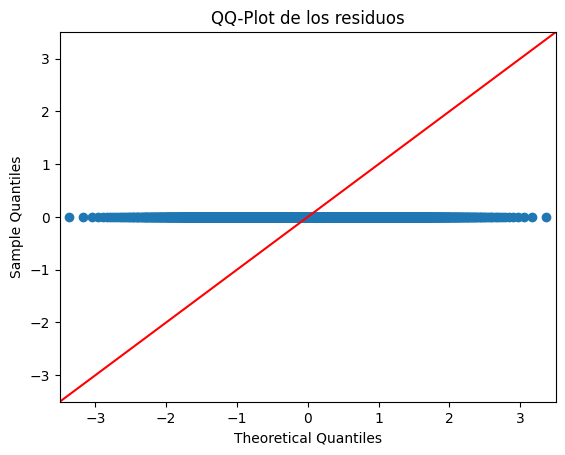

In [502]:
# QQ-Plot para verificar distribucion de residuos
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

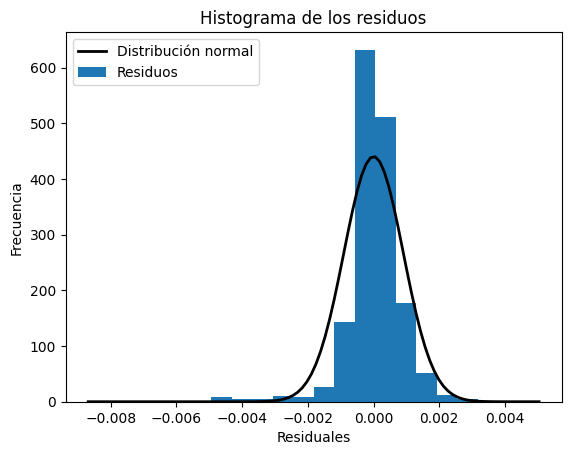

In [503]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

El modelo de regresión lineal multivariada logra un mejor ajuste que el modelo anterior —como lo demuestra el valor de R², que es mayor al del modelo previo y sugiere que el conjunto de variables utilizadas es más significativo que la variable "alcohol" por sí sola—, este modelo también queda invalidado, ya que no se cumple el supuesto de la normalidad de los residuos. 

Se descarta nuestra hipótesis y se concluye que no es posible predecir el valor de la variable "density" a partir del conjunto actual de variables predictoras

-------

Hipotesis 5: la calidad del vino se puede predecir con el nivel de alcohol

In [504]:
print("\n")
print("Información sobre la variable objetivo:")
print(preprocessed_dataset["quality"].info())



Información sobre la variable objetivo:
<class 'pandas.core.series.Series'>
Index: 2643 entries, 0 to 3230
Series name: quality
Non-Null Count  Dtype
--------------  -----
2643 non-null   int64
dtypes: int64(1)
memory usage: 41.3 KB
None


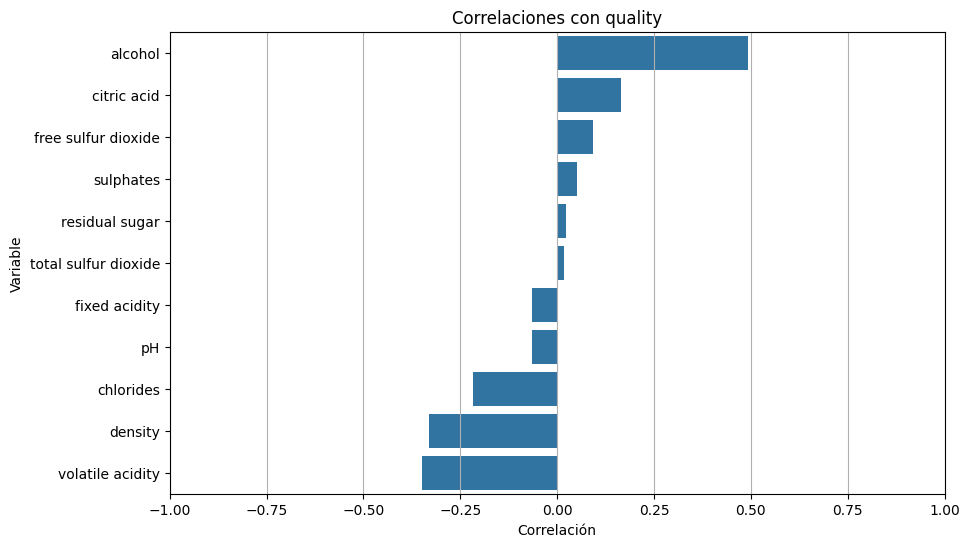

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las correlaciones con quality (calidad)
quality_correlations = correlation_matrix['quality'].drop('quality')

# Ordena las correlaciones de mayor a menor
sorted_correlations = quality_correlations.sort_values(ascending=False)

# Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones con quality')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()

Trataremos de probar la hipótesis de que la calidad de vino puede predecirse a partir del alcohol, ya que es la variable con la que tiene más correlación.

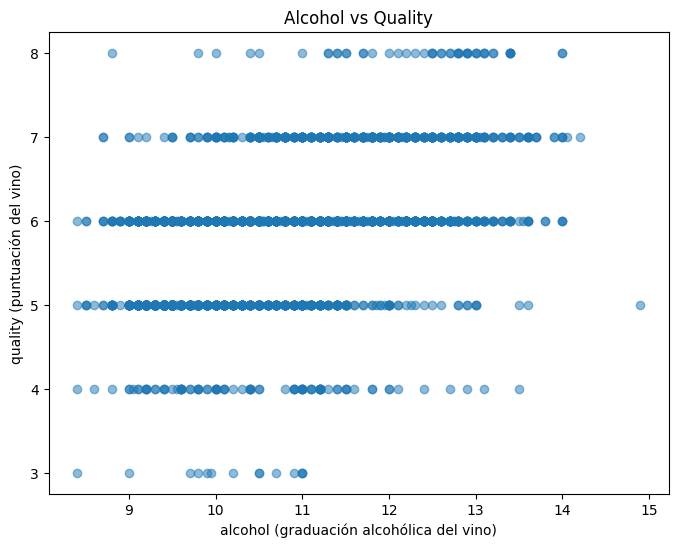

In [506]:
#Scatter plot entre alcohol y quality para ver la relación entre las dos variables

plt.figure(figsize=(8, 6))
plt.scatter(preprocessed_dataset['alcohol'], preprocessed_dataset['quality'], alpha=0.5)
plt.xlabel('alcohol (graduación alcohólica del vino)')
plt.ylabel('quality (puntuación del vino)')
plt.title('Alcohol vs Quality')
plt.show()

In [507]:
import numpy as np
import statsmodels.api as sm

# ajustamos el modelo de regresión lineal simple
# Separamos nuestra variable independiente
X = preprocessed_dataset['alcohol']
# y nuestra variable objetivo (variable dependiente)
y = preprocessed_dataset['quality']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     841.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          6.45e-161
Time:                        20:46:21   Log-Likelihood:                -2912.2
No. Observations:                2643   AIC:                             5828.
Df Residuals:                    2641   BIC:                             5840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1111      0.127     16.639      0.0

A partir del coeficiente de determinación (R-squared) se puede ver que el modelo explica aproximadamente el 24.2% de la varianza de la calidad del vino a partir de alcohol. El 24.2% de la variabilidad en la calidad del vino (quality) es explicada por el contenido o la graduacion alcoholica (alcohol).

Con el estadístico F medimos la significancia global del modelo. Su p-valor es muy bajo por lo que indica que el modelo es estadísticamente significativo. Esto significa que 'alcohol' tiene un efecto significativo en 'quality', o tambien que 'alcohol' es útil para predecir 'quality' con una confianza estadísticamente alta.

El coeficiente de alcohol es 0.3422, y es muy significativo porque su p-valor es bajo. Indica que cada incremento de 1 unidad en el porcentaje de alcohol está asociado con un aumento de 0.3422 puntos en quality.

Con el estadístico ómnibus y el Jarque Bera podemos ver que los residuos no siguen una distribución normal, ya que sus p-valores son muy bajos. Lo verificamos viendo el histograma de los residuos respecto la distribución normal. 

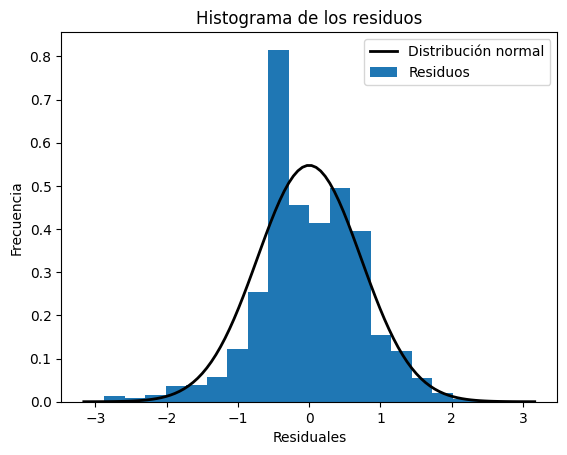

In [508]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

In [509]:
#Chequeamos normalidad de los residuos: 
from scipy.stats import shapiro

# aplicamos Shapiro-Wilk sobre los residuos
_, p = shapiro(model.resid)
print("p = %.4f" % (p))
# comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal (falló en rechazarse la hipótesis nula)")
else:
    print('No se distribuyen normal (se rechazó la hipótesis nula)')

p = 0.0000
No se distribuyen normal (se rechazó la hipótesis nula)


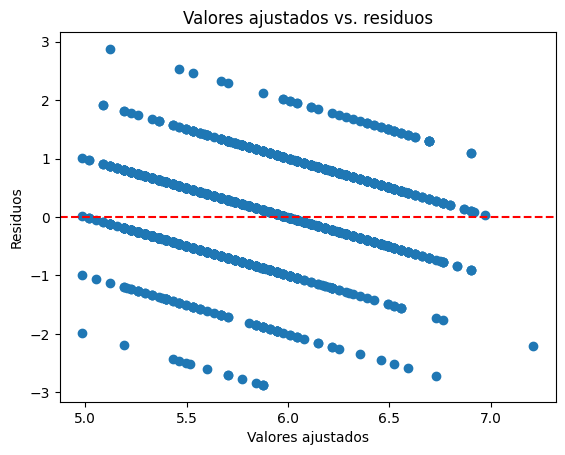

In [510]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores ajustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [511]:
#Recuperamos los residuos
model.resid

0      -0.149114
1       0.398410
2      -0.457096
3      -0.327828
4      -0.601590
          ...   
3225    0.637951
3226   -0.704251
3227    0.056208
3229   -0.601590
3230    0.124648
Length: 2643, dtype: float64

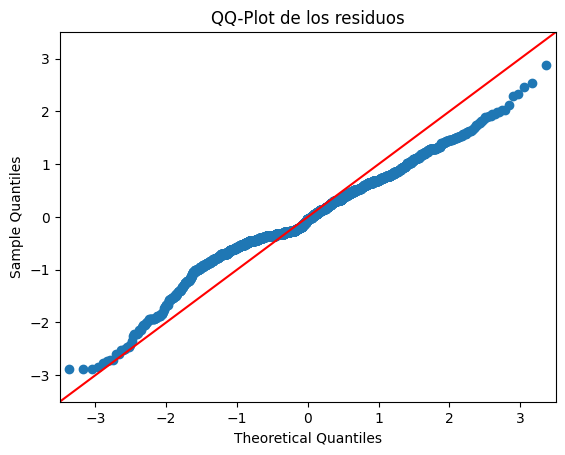

In [512]:
#Realizamos un QQ-plot para ver la normalidad de los residuos
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

Se puede ver que los residuos no respetan una distribución normal.

Respecto la autocorrelación de los residuales Durbin-Watson nos dió 1.806, muy cercano a 2, indicando que casi no hay autocorrelación significativa en los errores. 

Por último AIC nos dió: 5828, y BIC nos dió: 5840

Si no fuera porque los residuales no siguen una distribución normal, el modelo sugiere que la calidad del vino está positivamente asociada con el contenido de alcohol. A mayor alcohol, mayor calidad. Igualmente sabemos que el coef de determinación es bajo (0.242) por lo que alcohol solo explica una parte de la variabilidad en quality, haciendo probable que otros factores tambien tengan un papel importante en la determinación de la calidad del vino

- Como los residuales no siguen una distribución normal, se obliga a descartar la hipótesis donde se podria usar 'alcohol' para predecir 'quality'

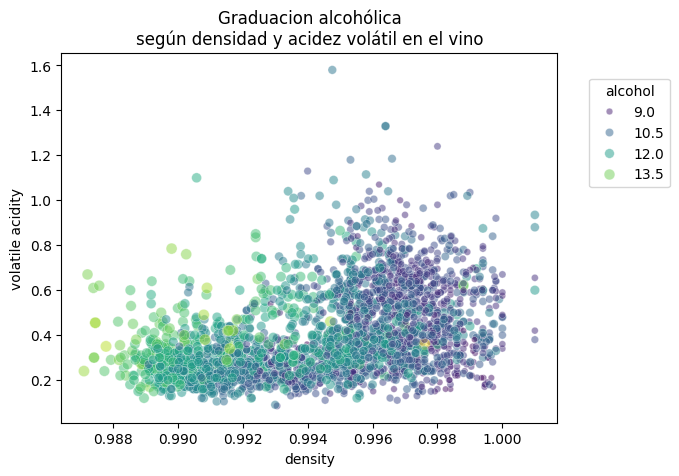

In [513]:
import seaborn as sns

sns.scatterplot(data=preprocessed_dataset, x="density", y="volatile acidity",
                size="alcohol", hue="alcohol",
                palette="viridis", alpha=0.5)
plt.legend(title="alcohol", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Graduacion alcohólica\nsegún densidad y acidez volátil en el vino")

In [514]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo (quality) de las variables predictoras
X = preprocessed_dataset.drop(columns=['type', 'quality'])
y = preprocessed_dataset['quality']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Imprimir las medias y desviaciones estándar antes del escalado
print("Medias y desviaciones estándar antes del escalado:")
print(pd.DataFrame(X).describe().loc[['mean', 'std']])

# Imprimir las medias y desviaciones estándar después del escalado
print("\nMedias y desviaciones estándar después del escalado:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std']])

Medias y desviaciones estándar antes del escalado:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       7.427393          0.410967     0.288278        4.145535   0.067198   
std        1.622016          0.192485     0.159172        3.768908   0.044126   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            24.932274             85.851116  0.994729  3.242978   
std             16.440835             53.544991  0.002885  0.163125   

      sulphates    alcohol  type_bool   cluster  
mean   0.577923  10.690908   0.514188  1.170639  
std    0.167589   1.201829   0.499893  1.060980  

Medias y desviaciones estándar después del escalado:
      fixed acidity  volatile acidity   citric acid  residual sugar  \
mean  -4.731575e-16      8.602863e-17  2.580859e-16   -4.301432e-17   
std    1.000189e+00      1.000189e+00  1.000189e+00    1.000189e+00   

         chlorides  free sulfur dioxide  total sulfur dioxide       densi

In [515]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Asegurarnos de que los índices de X_scaled_df y 'y' estén alineados
X_scaled_df = X_scaled_df.set_index(y.index)

# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     109.3
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          3.23e-235
Time:                        20:46:22   Log-Likelihood:                -2706.8
No. Observations:                2643   AIC:                             5442.
Df Residuals:                    2629   BIC:                             5524.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7696 

El coeficiente de determinacion R^2 nos dice que se explica un 35.2% de la variación en quality. (Algo mejor que antes)

El p-valor del estadístico F sigue siendo muy bajo, por lo que el modelo es estadísticamente significativo.

Los coeficientes significativos son: volatile acidity: por su p-valor de 0.000. Alcohol con el coeficiente más alto y un p-valor de 0.000. Tambien lo son: residual sugar, free y total sulfur dioxide, sulphates, density. Entre los no significativos estan fixed acidity, citric acid, pH.

Ambos tests Omnibus y el de Jarque-Bera indican que los residuos no siguen una distribución normal. Además se verifica observando el QQ-PLOT y el histograma de los residuos.

El estadístico de Durbin-Watson volvió a darnos un valor muy cercano a 2, indicando que casi no hay autocorrelación significativa en los errores. 

AIC nos dió: 5439, y BIC nos dió: 5521. Valores más bajos lo que es contraintuitivo

- Ya que en el modelo no se cumple el supuesto de que los residuales sigan una distribución normal se descarta la hipótesis.

Considerando el uso de la variable discreta 'quality', podemos entender el poco ajuste del modelo, y la poca varianza que se explica. Este tipo de variable no es lo mejor para usarse en este modelo de regresión lineal, por lo que sería óptimo realizar un modelo de regresión logística.

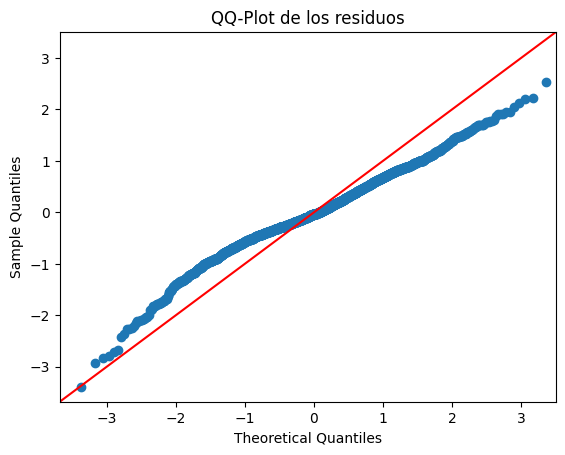

In [516]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

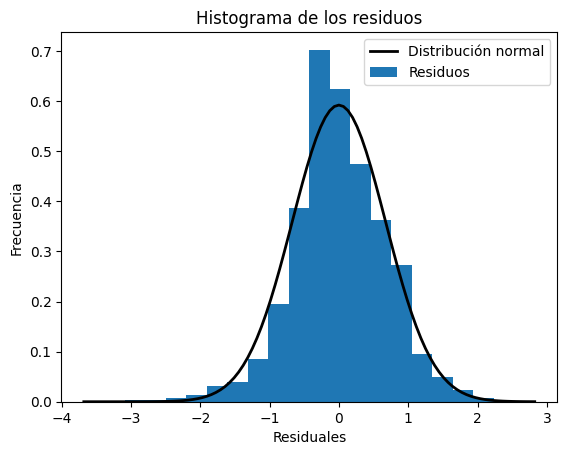

In [517]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()